In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Part 1- Load the dataset and understand structure of the data

In [2]:
df=pd.read_json("transactions.txt",lines=True, dtype=True)

In [3]:
df.shape
print(f'Shape of the dataset is {str(df.shape[0])} x {str(df.shape[1])}')

Shape of the dataset is 786363 x 29


In [4]:
cols=df.columns
cols_str=', '.join(i for i in cols)
print('Fields in each record are ', cols_str)

Fields in each record are  accountNumber, customerId, creditLimit, availableMoney, transactionDateTime, transactionAmount, merchantName, acqCountry, merchantCountryCode, posEntryMode, posConditionCode, merchantCategoryCode, currentExpDate, accountOpenDate, dateOfLastAddressChange, cardCVV, enteredCVV, cardLast4Digits, transactionType, echoBuffer, currentBalance, merchantCity, merchantState, merchantZip, cardPresent, posOnPremises, recurringAuthInd, expirationDateKeyInMatch, isFraud


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

There are 29 columns in the dataset: 3 are boolean (True/False), 9 numerical columns (float and int), and 17 object (string and date columns). 

Initial functions show no null values ... but we will investigate

##### **Understanding structure of the data and basic statistics**

In [6]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [7]:
#the null values dont seem to be showing up, probably due to null character assignment 
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

echoBuffer, posOnPremises, recurringAuthInd, merchantCity, merchantState, merchantZip are columns with only empty cell values. I will check their value counts, and then eliminate the columns if there are no non-null values 

In [8]:
null_cols=['echoBuffer', 'posOnPremises', 'recurringAuthInd', 'merchantCity', 'merchantState', 'merchantZip']
for col in null_cols:
    print(col)
    print(df[col].value_counts())

echoBuffer
echoBuffer
    786363
Name: count, dtype: int64
posOnPremises
posOnPremises
    786363
Name: count, dtype: int64
recurringAuthInd
recurringAuthInd
    786363
Name: count, dtype: int64
merchantCity
merchantCity
    786363
Name: count, dtype: int64
merchantState
merchantState
    786363
Name: count, dtype: int64
merchantZip
merchantZip
    786363
Name: count, dtype: int64


Since none of them have any non-null_values, the six columns can be dropped

In [9]:
df.drop(columns=null_cols, inplace=True)
df.shape

(786363, 23)

Now the table only has 23 columns 

transactionDateTime is a datetime column, and currentExpDate, accountOpenDate, dateOfLastAddressChange are date columns 

In [10]:
date_cols=['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']

for i in date_cols:
    df[i]=pd.to_datetime(df[i])
df.head(5)

C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\3065840800.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[i]=pd.to_datetime(df[i])


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              786363 non-null  object        
 10  posConditionCode          786363 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [12]:
#list of numerical columns
num_cols = df.select_dtypes([np.number]).columns
print(str(len(num_cols)), " numerical columns : ", ', '.join(i for i in num_cols))

#list of datetime columns
date_cols = df.select_dtypes([np.datetime64]).columns
print(str(len(date_cols)), " date columns : ", ', '.join(i for i in date_cols))

#list of boolean columns
bool_cols=['cardPresent','expirationDateKeyInMatch', 'isFraud']
print(str(len(bool_cols)), " boolean columns : ", ', '.join(i for i in bool_cols))

#list of categorical columns
cat_cols=list(set(df.columns.to_list())-set([*num_cols, *date_cols, *bool_cols]))
print(str(len(cat_cols)), " categorical columns : ", ', '.join(i for i in cat_cols))



9  numerical columns :  accountNumber, customerId, creditLimit, availableMoney, transactionAmount, cardCVV, enteredCVV, cardLast4Digits, currentBalance
4  date columns :  transactionDateTime, currentExpDate, accountOpenDate, dateOfLastAddressChange
3  boolean columns :  cardPresent, expirationDateKeyInMatch, isFraud
7  categorical columns :  merchantCategoryCode, merchantName, transactionType, posConditionCode, posEntryMode, merchantCountryCode, acqCountry


##### Summary Statistics for the numerical and date columns

In [13]:
summary_statistics=df.describe().round(2).T
summary_statistics

,count,mean,min,25%,50%,75%,max,std
accountNumber,786363.0,537232599.46,100088067.0,330133277.0,507456073.0,767620004.0,999389635.0,255421092.31
customerId,786363.0,537232599.46,100088067.0,330133277.0,507456073.0,767620004.0,999389635.0,255421092.31
creditLimit,786363.0,10759.46,250.0,5000.0,7500.0,15000.0,50000.0,11636.17
availableMoney,786363.0,6250.73,-1005.63,1077.42,3184.86,7500.0,50000.0,8880.78
transactionDateTime,786363,2016-07-06 01:58:58.395681536,2016-01-01 00:01:02,2016-04-06 19:35:07,2016-07-08 05:03:57,2016-10-05 13:52:03.500000,2016-12-30 23:59:45,NaN
transactionAmount,786363.0,136.99,0.0,33.65,87.9,191.48,2011.54,147.73
currentExpDate,786363,2026-09-25 23:50:42.724542720,2019-12-01 00:00:00,2023-05-01 00:00:00,2026-10-01 00:00:00,2030-03-01 00:00:00,2033-08-01 00:00:00,NaN
accountOpenDate,786363,2014-02-03 01:11:17.352825856,1989-08-22 00:00:00,2013-06-29 00:00:00,2014-09-05 00:00:00,2015-05-04 00:00:00,2015-12-31 00:00:00,NaN
dateOfLastAddressChange,786363,2015-04-14 06:46:41.127723520,1989-08-22 00:00:00,2014-10-08 00:00:00,2016-01-13 00:00:00,2016-06-06 00:00:00,2016-12-30 00:00:00,NaN
cardCVV,786363.0,544.47,100.0,310.0,535.0,785.0,998.0,261.52


#### Lets look at # of unique values in all columns

In [14]:
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

check relationship between account number and customerId

In [15]:
account=df['accountNumber'].unique()
customer=df['customerId'].unique()
comparison = account== customer
equal_arrays = comparison.all()
print(equal_arrays)

True


Find out fraudulent transactions vs. rest

In [16]:
df['isFraud'].value_counts()[1]/df['isFraud'].value_counts().sum()

C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\3605688011.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['isFraud'].value_counts()[1]/df['isFraud'].value_counts().sum()


0.01579041740264992

Obseravations: 
1. accountNumber and customerId both have equal unique values (5000). It is a 1-1 match between the two columns
2. 10 different credit limits offered by Capital One
3. Only 1.58% of the transactions are fraudulent


In [17]:
#df['posConditionCode']=df['posConditionCode'].replace('',np.NaN)
#df.info()

# PART 2 - Make plots and Exploratory Statistical Observations
- histogram of the processed amounts of each transaction - TransactionAmount
- other plots

[Text(0, 0.5, 'Frequency')]

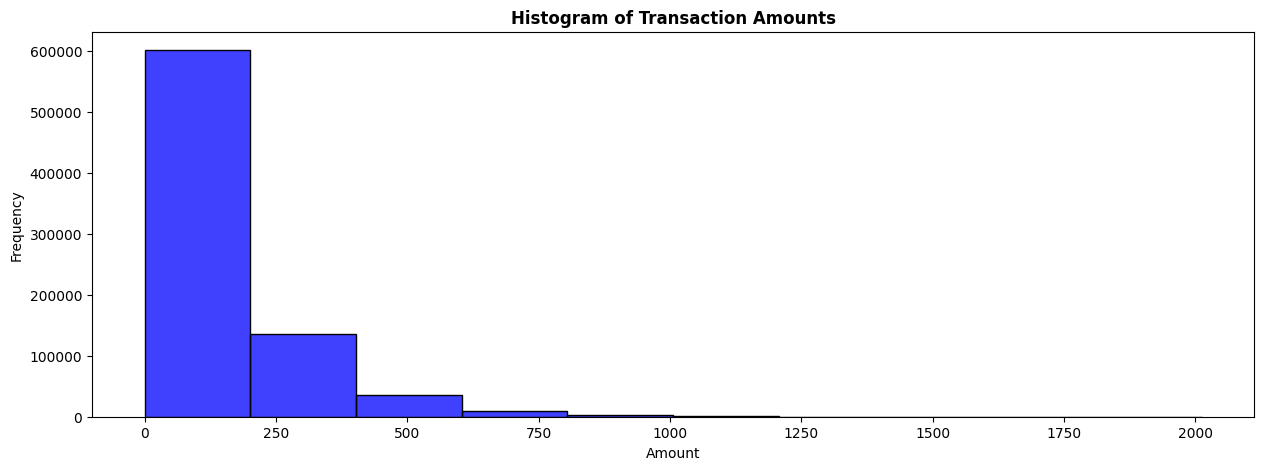

In [18]:
plt.figure(figsize=(15, 5))
plt.title('Histogram of Transaction Amounts', weight='bold')
ax=sns.histplot(data=df, x="transactionAmount", color='blue',bins=10)
ax.set(xlabel='Amount')
ax.set(ylabel='Frequency')

lets break it down by fraudulent transactions

[Text(0, 0.5, 'Frequency')]

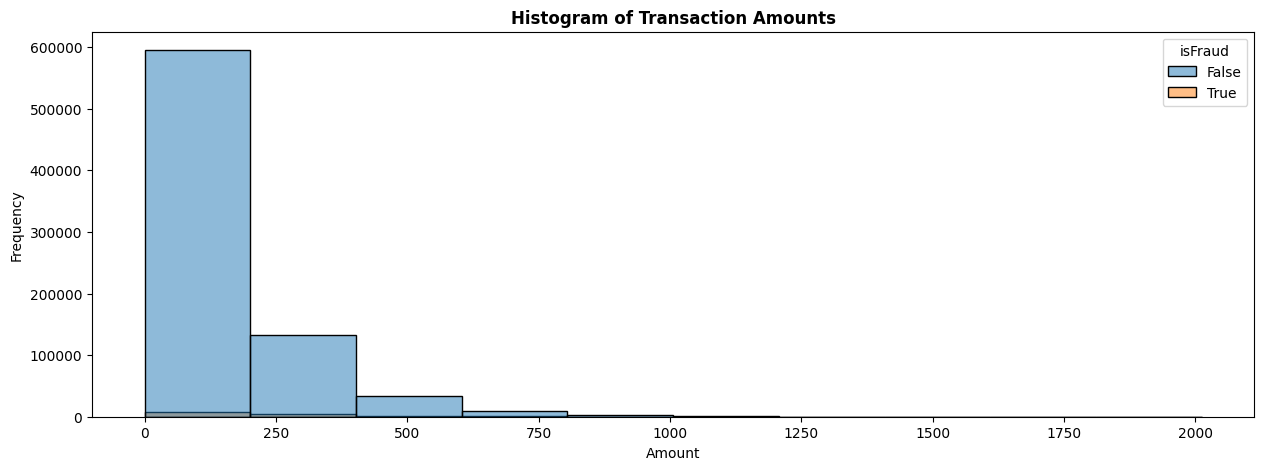

In [19]:
plt.figure(figsize=(15, 5))
plt.title('Histogram of Transaction Amounts', weight='bold')
ax=sns.histplot(data=df, x="transactionAmount", color='blue',bins=10, hue='isFraud')
ax.set(xlabel='Amount')
ax.set(ylabel='Frequency')

<Axes: xlabel='transactionAmount'>

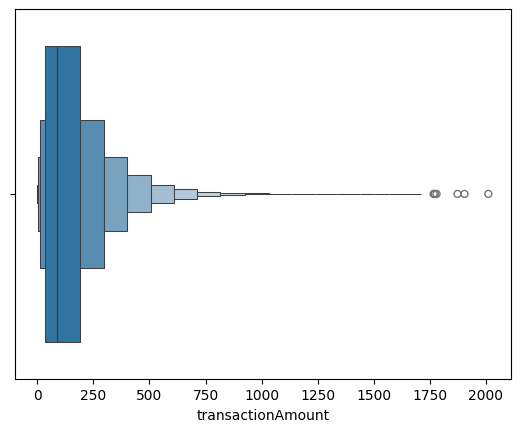

In [20]:
plt.figure
sns.boxenplot(df, x='transactionAmount')

The column 'transactionAmount' has a mean of 137 dollars, with a std deviation of 147.7 dollars and a median of 88 dollars.

EDA for the categorical and boolean features

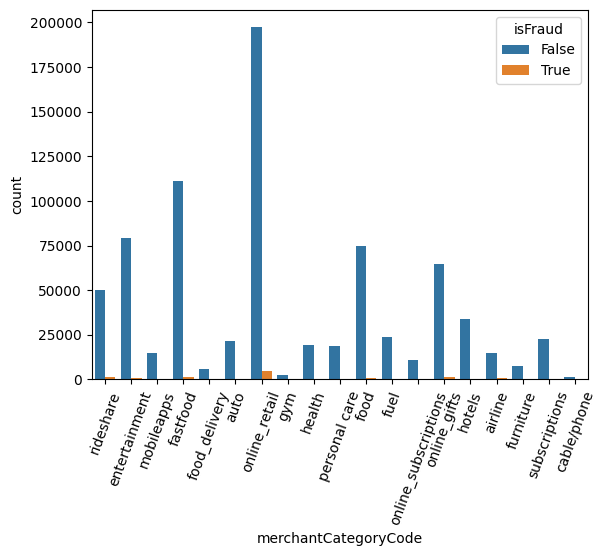

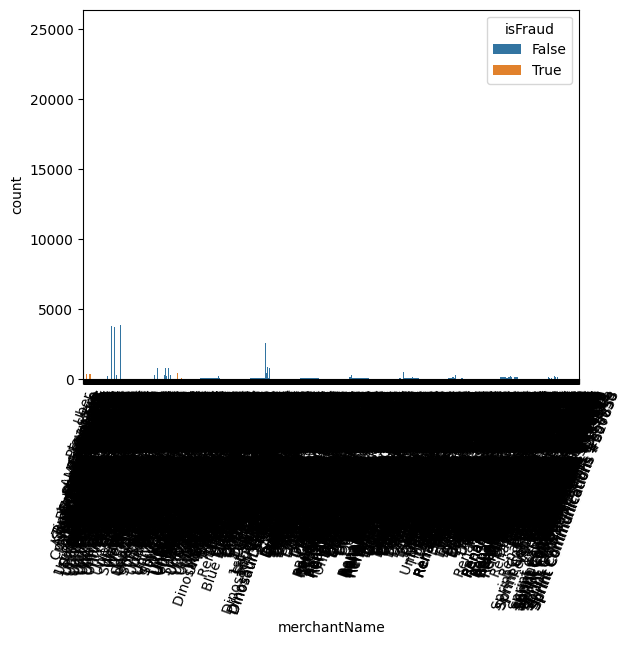

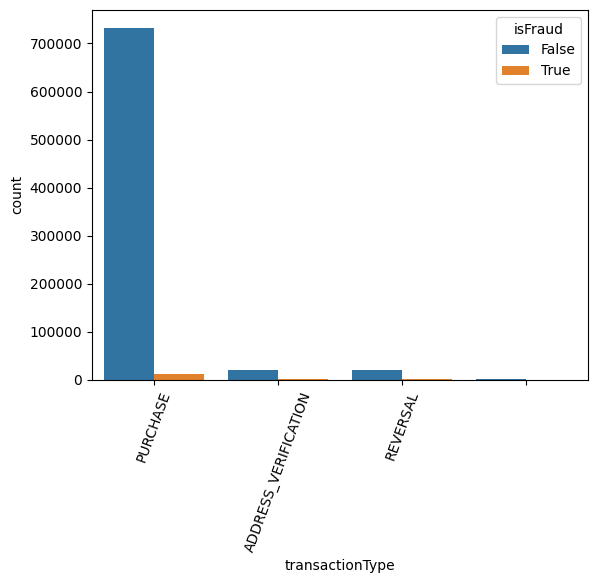

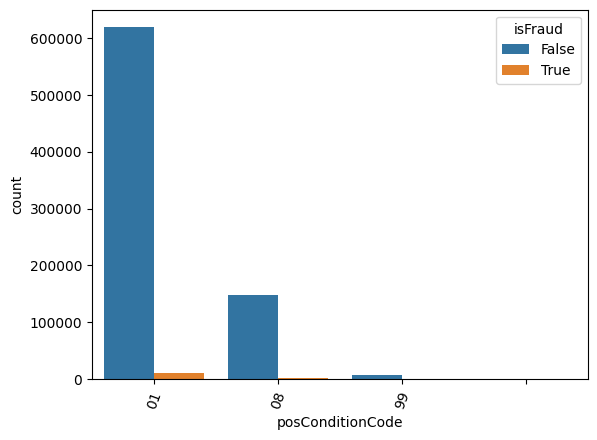

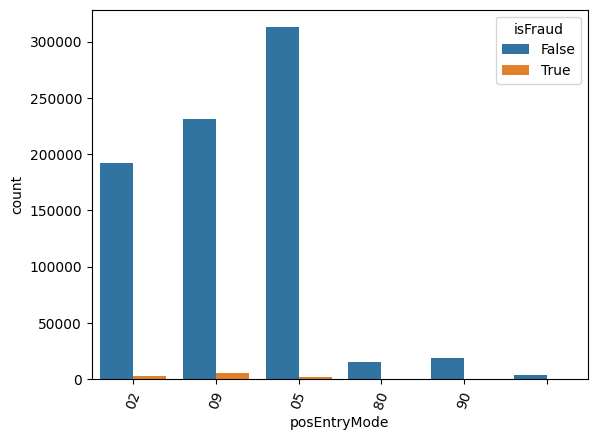

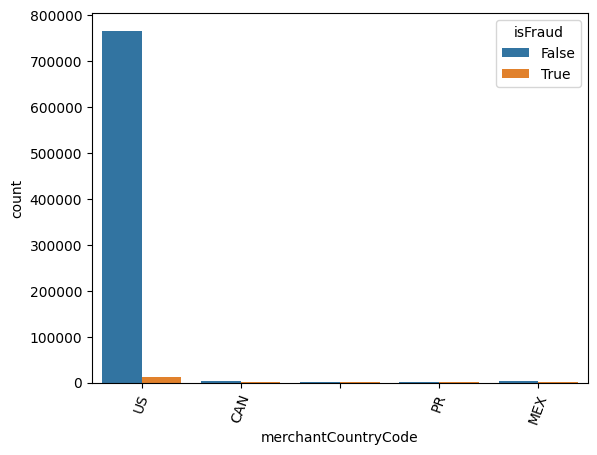

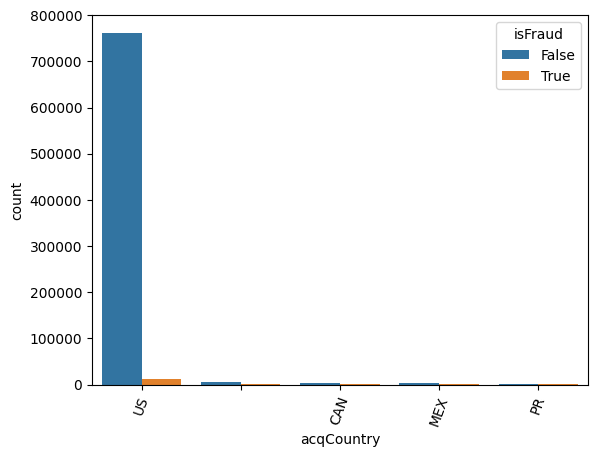

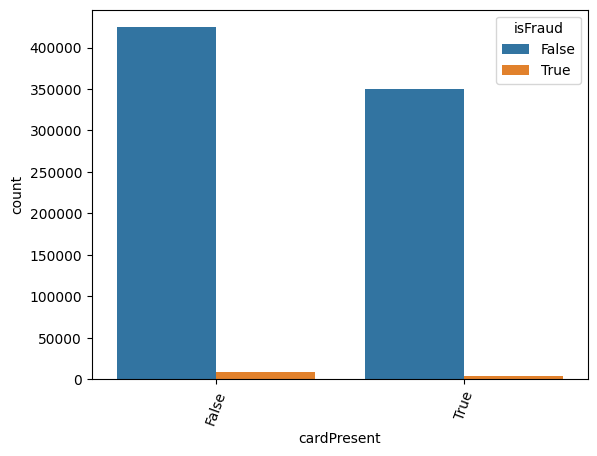

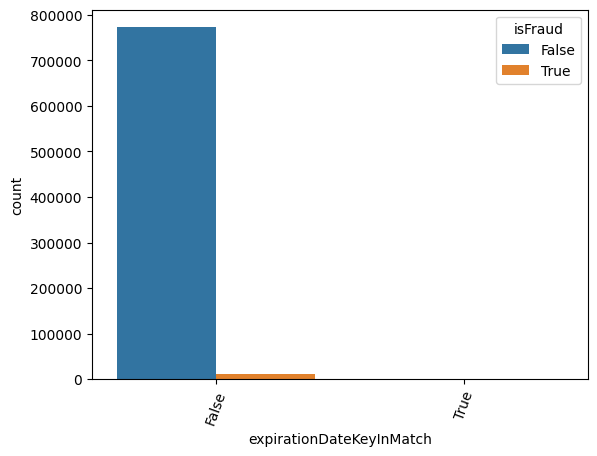

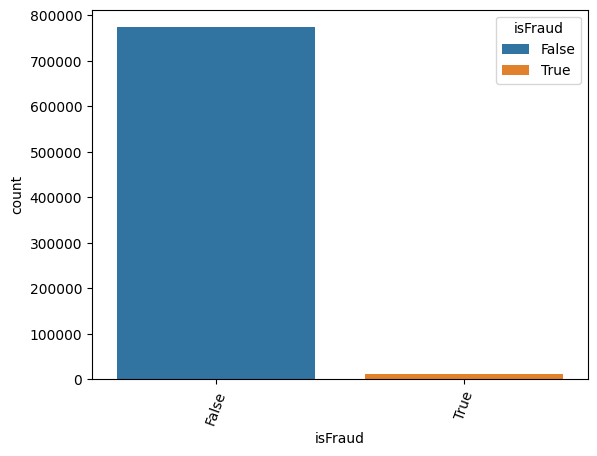

In [21]:
for i in [*cat_cols, *bool_cols]:
    plt.figure()
    sns.countplot(data=df, x=i, hue='isFraud')
    plt.xticks(rotation=70)


analyzing the posConditionCode column

In [22]:
def col_stats(df, col, target_pos): 

    print ('basic statistics')
    print(df[col].value_counts())
    print(f'{col}: ', df[col].value_counts()[target_pos]/df[col].value_counts().sum())

    print ('\n statistics for fraud')
    print(df[df['isFraud']==True][col].value_counts())
    print('percentage: ', df[df['isFraud']==True][col].value_counts()[target_pos]/df[df['isFraud']==True][col].value_counts().sum())


In [23]:
# print(df['posConditionCode'].value_counts())
# print('percentage: ', df['posConditionCode'].value_counts()[0]/df['posConditionCode'].value_counts().sum())

In [24]:
# df[df['isFraud']==True]['posConditionCode'].value_counts()
# #print('percentage: ', df['posConditionCode'].value_counts()[0]/df['posConditionCode'].value_counts().sum())


In [25]:
col_stats(df, 'posConditionCode', 0)

basic statistics
posConditionCode
01    628787
08    149634
99      7533
         409
Name: count, dtype: int64
posConditionCode:  0.7996141730981747

 statistics for fraud
posConditionCode
01    10230
08     1936
99      229
         22
Name: count, dtype: int64
percentage:  0.8238705001208021


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{col}: ', df[col].value_counts()[target_pos]/df[col].value_counts().sum())
C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('percentage: ', df[df['isFraud']==True][col].value_counts()[target_pos]/df[df['isFraud']==True][col].value_counts().sum())


analyzing merchantCountryCode and acqcountry columns

In [26]:
col_stats(df, 'merchantCountryCode', 0)

basic statistics
merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: count, dtype: int64
merchantCountryCode:  0.9900147896073442

 statistics for fraud


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{col}: ', df[col].value_counts()[target_pos]/df[col].value_counts().sum())


merchantCountryCode
US     12188
          82
MEX       64
CAN       56
PR        27
Name: count, dtype: int64
percentage:  0.9815575420794073


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('percentage: ', df[df['isFraud']==True][col].value_counts()[target_pos]/df[df['isFraud']==True][col].value_counts().sum())


analzying acqCountry

In [27]:
col_stats(df, 'acqCountry', 0)

basic statistics
acqCountry
US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64
acqCountry:  0.9851798723998968

 statistics for fraud


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{col}: ', df[col].value_counts()[target_pos]/df[col].value_counts().sum())


acqCountry
US     12122
         149
MEX       64
CAN       55
PR        27
Name: count, dtype: int64
percentage:  0.9762422485302408


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('percentage: ', df[df['isFraud']==True][col].value_counts()[target_pos]/df[df['isFraud']==True][col].value_counts().sum())


analyzing merchantCategoryCode

In [28]:
#df['merchantCategoryCode'].value_counts()
col_stats(df, 'merchantCategoryCode', 0)

basic statistics
merchantCategoryCode
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: count, dtype: int64
merchantCategoryCode:  0.2570772022590076

 statistics for fraud


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{col}: ', df[col].value_counts()[target_pos]/df[col].value_counts().sum())


merchantCategoryCode
online_retail    4938
online_gifts     1606
rideshare        1272
fastfood         1074
food             1014
entertainment     961
airline           534
auto              273
hotels            250
subscriptions     216
furniture         103
health             90
personal care      86
Name: count, dtype: int64
percentage:  0.39768059917854554


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('percentage: ', df[df['isFraud']==True][col].value_counts()[target_pos]/df[df['isFraud']==True][col].value_counts().sum())


analyzing expirationDateKeyInMatch 

In [29]:
#df['expirationDateKeyInMatch'].value_counts()
col_stats(df, 'expirationDateKeyInMatch', 0)

basic statistics
expirationDateKeyInMatch
False    785320
True       1043
Name: count, dtype: int64
expirationDateKeyInMatch:  0.9986736405451426

 statistics for fraud
expirationDateKeyInMatch
False    12404
True        13
Name: count, dtype: int64
percentage:  0.9989530482403157


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{col}: ', df[col].value_counts()[target_pos]/df[col].value_counts().sum())
C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('percentage: ', df[df['isFraud']==True][col].value_counts()[target_pos]/df[df['isFraud']==True][col].value_counts().sum())


analyzing transactionType

In [30]:
col_stats(df, 'transactionType', 0)

basic statistics
transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: count, dtype: int64


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{col}: ', df[col].value_counts()[target_pos]/df[col].value_counts().sum())


transactionType:  0.9476450443370301

 statistics for fraud
transactionType
PURCHASE                11950
REVERSAL                  337
ADDRESS_VERIFICATION      116
                           14
Name: count, dtype: int64
percentage:  0.96239027140211


C:\Users\Harsh Vora\AppData\Local\Temp\ipykernel_17568\1090248735.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('percentage: ', df[df['isFraud']==True][col].value_counts()[target_pos]/df[df['isFraud']==True][col].value_counts().sum())


Analyzing numerical features

In [31]:
# Credit Limit types
df['creditLimit'].unique()

array([ 5000,  2500, 50000, 15000, 10000,   250,   500,  1000,  7500,
       20000], dtype=int64)

<Axes: xlabel='creditLimit', ylabel='count'>

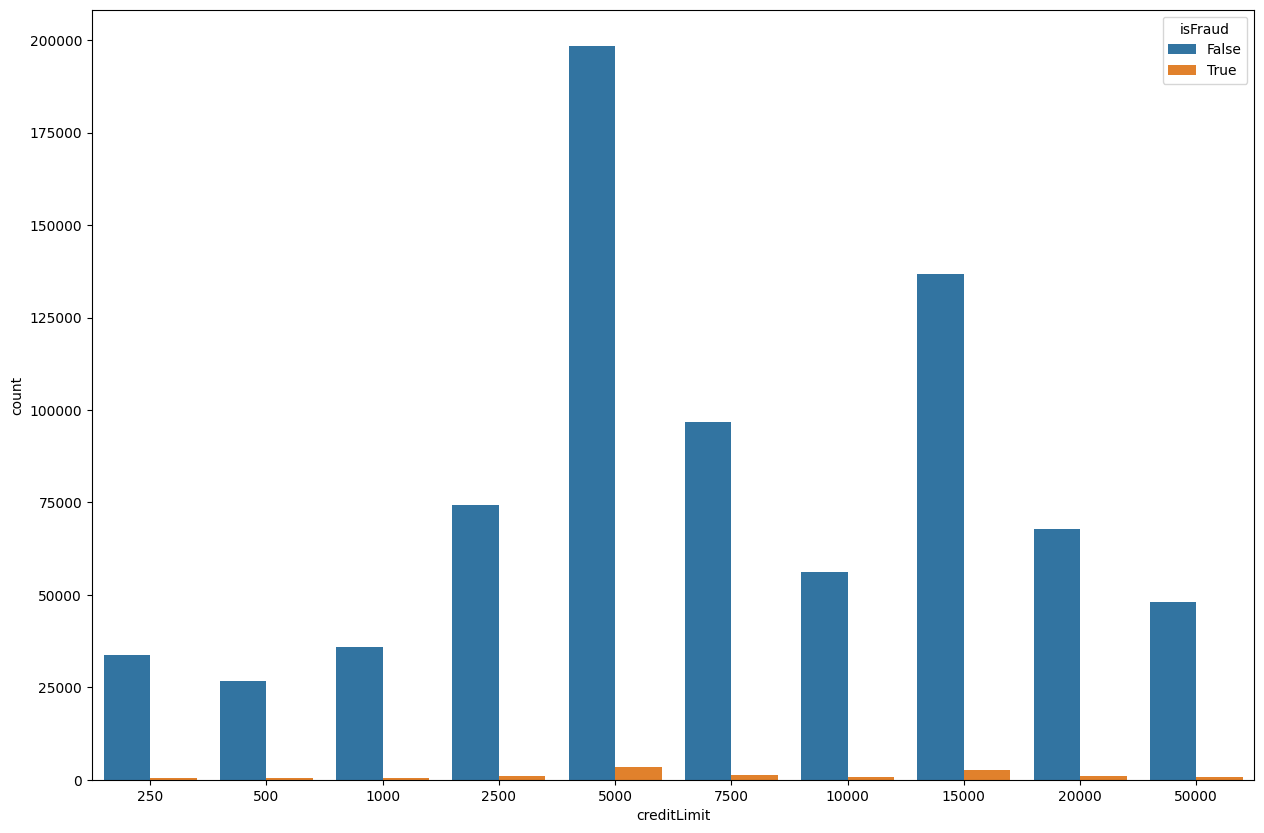

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='creditLimit', hue='isFraud')

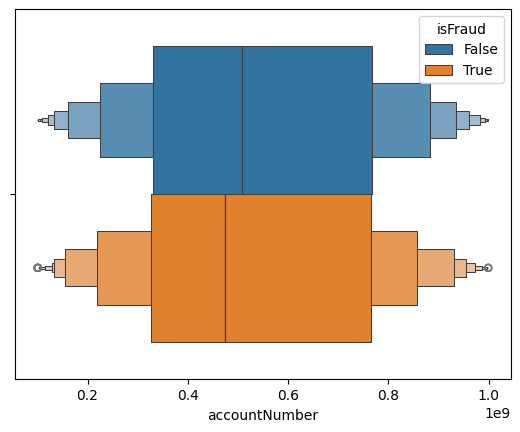

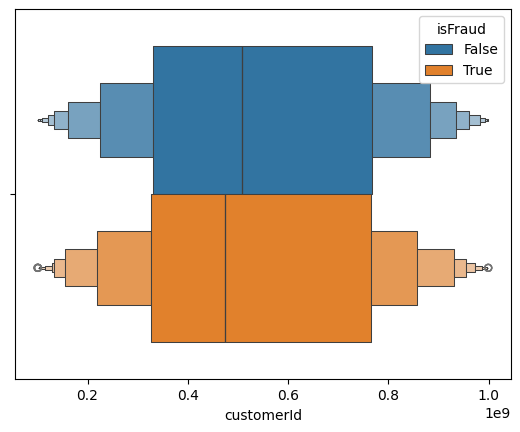

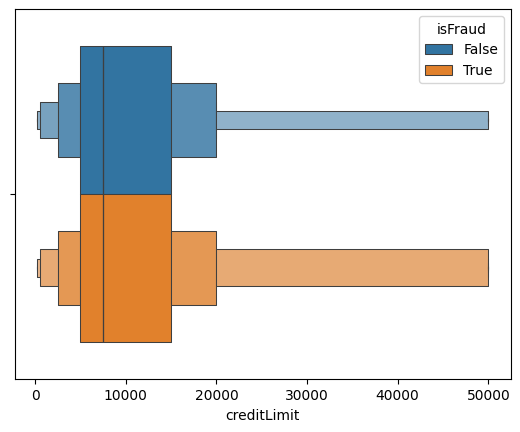

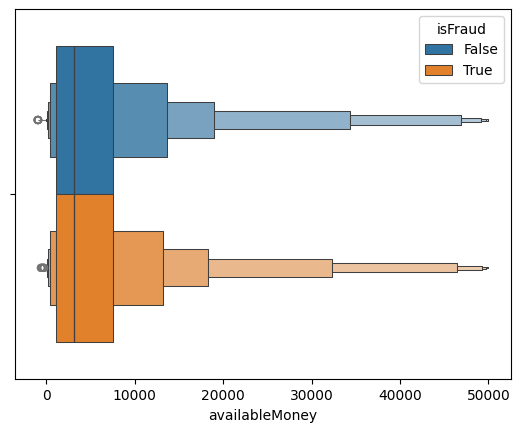

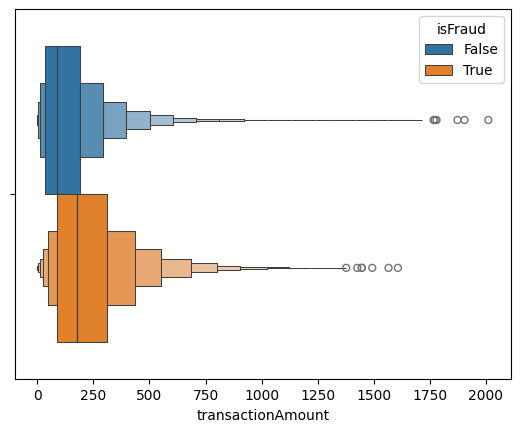

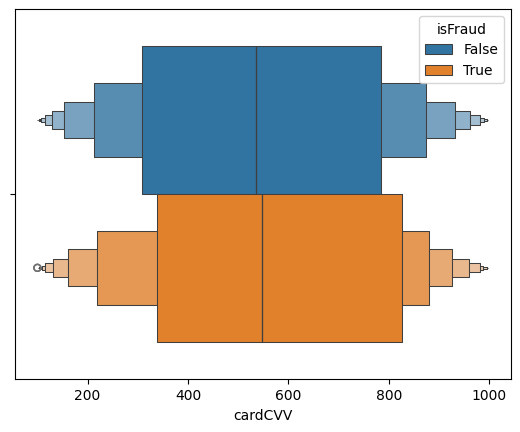

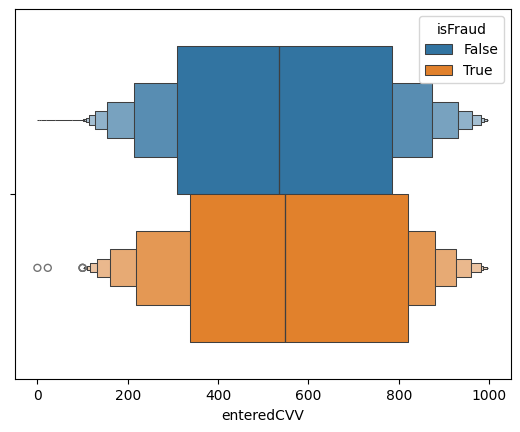

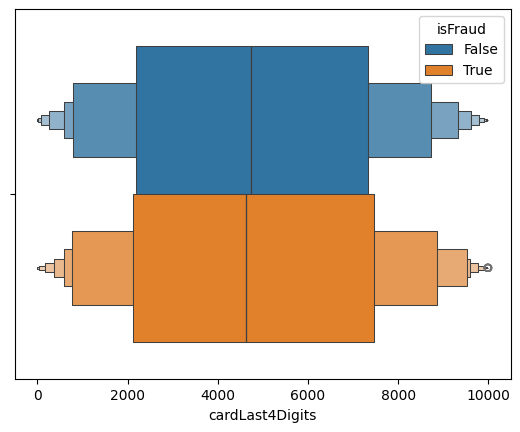

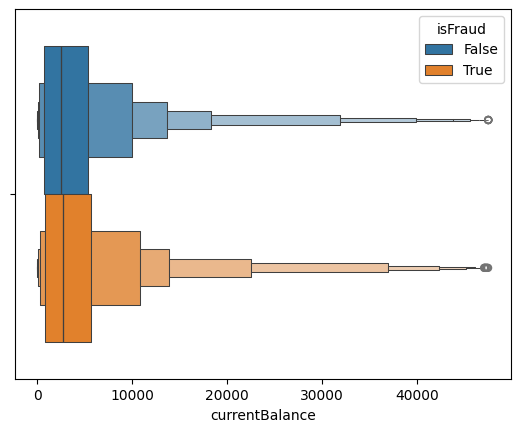

In [33]:
for i in num_cols:
    plt.figure()
    sns.boxenplot(data=df, x=i, hue='isFraud')

### EDA observations:

1. approximately 80% of transactions have posConditionCode value of "01". 82% of transactions marked as fraud have a value posConditionCode of "01". 22 rows have empty cell values. 

2. Transactions with merchants in USA account for 99% of the transactions and 98% of the fraud. 724 rows have blank empty cells for "merchantCountryCode". 

3. Transactions with acqCountry as USA account for 98.5% of the transactions and 97.6% of the fraud. 4562 rows have blank empty cells for "merchantCountryCode". 

4. Transactions with transactionType as PURCHASE account for 94.7& of the transactions and 96.2% of the fraud. 698 rows have blank empty cells for "merchantCountryCode".

5. merchantCategoryCode = 'online_retail' accounts for 25% of transactions, but 40% of fraud. 

6. 99.9% transactions marked as fraudulent have expirationDateKeyInMatch as "False" 

7. Accounts with credit limits between 2500 and 15000 dominantly feature in transactions flagged as fraudulent

8. For transactions marked as fraudulent, median amount of availableMoney is slighlty lower compared to non-fraudulent transactions

9. Distribution of transactionAmount varies significantly between fraudulent and non-fraudulent transactions. The median transactionAmount values are greater when isFraud=True and this is reflective in the 25th, 75th quantile values also. 






# PART 3 - Data Wrangling for Duplicate Transactions 

Creating a copy of the dataset, where we have already droppped the null columns. Will need to process the rows with null column values. 

In [34]:
df2=df.copy()

create a primary key for the dataframe that can identify 

1. who was the payer
2. who was the payee
3. when did the transaction occur
4. what was the amount
5. what was the type of the transaction 

In [35]:
df2['transaction_date']=df2['transactionDateTime'].dt.date

In [36]:
df2['transaction_date'].value_counts()

transaction_date
2016-12-09    2388
2016-12-29    2369
2016-11-26    2351
2016-12-10    2350
2016-12-20    2349
              ... 
2016-01-02    1927
2016-02-04    1915
2016-01-30    1915
2016-01-07    1897
2016-01-14    1894
Name: count, Length: 365, dtype: int64

In [37]:
pkey_cols=['customerId', 'merchantName', 'transactionDateTime', 'transactionAmount', 'transactionType']
df2['pkey']=df2[pkey_cols].apply(lambda row: "_".join(row.values.astype(str)), axis=1)
df2.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_date,pkey
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08-13,737265056_Uber_2016-08-13 14:27:32_98.55_PURCHASE
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10-11,737265056_AMC #191138_2016-10-11 05:05:54_74.5...
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11-08,737265056_Play Store_2016-11-08 09:18:39_7.47_...
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12-10,737265056_Play Store_2016-12-10 02:14:50_7.47_...
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03-24,830329091_Tim Hortons #947751_2016-03-24 21:04...


replace the empty cells with np.nan

In [38]:
df2=df2.replace('',np.nan)

In [39]:
df2.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
transaction_date               0
pkey                           0
dtype: int64

creating a column that only has date of the transaction, this can be used to group by merchant and 

### Looking at reverse transactions

In [40]:
df2['transactionType'].value_counts()

transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: count, dtype: int64

In [41]:
reverse_transactions=df2[df2['transactionType']=='REVERSAL']
reverse_transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_date,pkey
39,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False,2016-05-24,574788567_Convenient Tire_2016-05-24 01:38:03_...
73,574788567,574788567,2500,2432.72,2016-10-07 10:23:57,3.87,Eazy Repair,US,US,05,01,auto,2022-10-01,2015-10-13,2015-10-13,579,579,4219,REVERSAL,67.28,True,False,False,2016-10-07,574788567_Eazy Repair_2016-10-07 10:23:57_3.87...
101,924729945,924729945,50000,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,205,265,9459,REVERSAL,168.57,False,False,False,2016-10-19,924729945_discount.com_2016-10-19 14:01:45_168...
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False,2016-01-16,984504651_Planet Fitness #849960_2016-01-16 09...
156,984504651,984504651,50000,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,8090.70,True,False,False,2016-01-25,984504651_AMC #724446_2016-01-25 20:39:15_81.7...


In [42]:
reverse_transactions.shape

(20303, 25)

In [43]:
reverse_dollar=reverse_transactions['transactionAmount'].sum()

In [44]:
print (f'There are {str(reverse_transactions.shape[0])} reversed transactions in the dataset, with a total dollar value of {str(reverse_dollar)}')

There are 20303 reversed transactions in the dataset, with a total dollar value of 2821792.5


### Identifying multiswipe transactions

first we need to remove the identified reverse transactions from the dataset

In [45]:
df3=df2[~(df2['pkey'].isin(reverse_transactions['pkey']))]
df3.shape

(766060, 25)

creating a key based on date instead of datetime -- we should see duplicates in this column for multiswipes 

We will also make the key assumption that a series of multiswipe transactions occur within the same day

In [46]:
skey_cols=['customerId', 'merchantName', 'transaction_date', 'transactionAmount', 'transactionType']
df2['skey']=df2[skey_cols].apply(lambda row: "_".join(row.values.astype(str)), axis=1)
df2.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_date,pkey,skey
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08-13,737265056_Uber_2016-08-13 14:27:32_98.55_PURCHASE,737265056_Uber_2016-08-13_98.55_PURCHASE
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10-11,737265056_AMC #191138_2016-10-11 05:05:54_74.5...,737265056_AMC #191138_2016-10-11_74.51_PURCHASE
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11-08,737265056_Play Store_2016-11-08 09:18:39_7.47_...,737265056_Play Store_2016-11-08_7.47_PURCHASE
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12-10,737265056_Play Store_2016-12-10 02:14:50_7.47_...,737265056_Play Store_2016-12-10_7.47_PURCHASE
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03-24,830329091_Tim Hortons #947751_2016-03-24 21:04...,830329091_Tim Hortons #947751_2016-03-24_71.18...


In [47]:
df2['mswipe_bool'] = df2['skey'].duplicated(keep=False).map({True:1, False:0})
df2.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_date,pkey,skey,mswipe_bool
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08-13,737265056_Uber_2016-08-13 14:27:32_98.55_PURCHASE,737265056_Uber_2016-08-13_98.55_PURCHASE,0
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10-11,737265056_AMC #191138_2016-10-11 05:05:54_74.5...,737265056_AMC #191138_2016-10-11_74.51_PURCHASE,0
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11-08,737265056_Play Store_2016-11-08 09:18:39_7.47_...,737265056_Play Store_2016-11-08_7.47_PURCHASE,0
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12-10,737265056_Play Store_2016-12-10 02:14:50_7.47_...,737265056_Play Store_2016-12-10_7.47_PURCHASE,0
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03-24,830329091_Tim Hortons #947751_2016-03-24 21:04...,830329091_Tim Hortons #947751_2016-03-24_71.18...,0


In [48]:
df2['mswipe_bool'].value_counts()

mswipe_bool
0    771412
1     14951
Name: count, dtype: int64

In [49]:
print(f"there are {str(df2['mswipe_bool'].value_counts()[1])} duplicated transactions")

there are 14951 duplicated transactions


I will create a dataset of the multiswipe transactions and separate the original transaction from the subsequent swipes

In [50]:
mswipe_transactions = df2[df2["mswipe_bool"] == 1].copy()
mswipe_transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_date,pkey,skey,mswipe_bool
262,984504651,984504651,50000,26799.51,2016-03-12 06:34:13,118.52,AMC #706324,US,US,02,01,entertainment,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,23200.49,True,False,False,2016-03-12,984504651_AMC #706324_2016-03-12 06:34:13_118....,984504651_AMC #706324_2016-03-12_118.52_PURCHASE,1
263,984504651,984504651,50000,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,02,01,entertainment,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,23319.01,True,False,False,2016-03-12,984504651_AMC #706324_2016-03-12 06:34:29_118....,984504651_AMC #706324_2016-03-12_118.52_PURCHASE,1
264,984504651,984504651,50000,26562.47,2016-03-12 06:36:41,118.52,AMC #706324,US,US,02,01,entertainment,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,23437.53,True,False,False,2016-03-12,984504651_AMC #706324_2016-03-12 06:36:41_118....,984504651_AMC #706324_2016-03-12_118.52_PURCHASE,1
280,984504651,984504651,50000,24342.83,2016-03-18 13:56:20,26.71,Planet Fitness #692929,US,US,02,01,health,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,25657.17,True,False,False,2016-03-18,984504651_Planet Fitness #692929_2016-03-18 13...,984504651_Planet Fitness #692929_2016-03-18_26...,1
281,984504651,984504651,50000,24316.12,2016-03-18 13:57:04,26.71,Planet Fitness #692929,US,US,02,01,health,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,25683.88,True,False,False,2016-03-18,984504651_Planet Fitness #692929_2016-03-18 13...,984504651_Planet Fitness #692929_2016-03-18_26...,1


In [51]:
original_swipes=mswipe_transactions.sort_values(by='pkey').drop_duplicates('skey', keep='first')
original_swipes.shape[0]

7119

In [52]:
# original_swipes2=df2[df2['mswipe_bool']==1].sort_values(by='pkey').drop_duplicates('skey', keep='first')
# print(original_swipes2.shape[0])
# rkeys = list(original_swipes2["pkey"].unique())
# print(len(rkeys))

In [53]:
original_swipes

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_date,pkey,skey,mswipe_bool
541955,100088067,100088067,50000,49686.44,2016-10-16 18:01:00,411.35,Fresh Flowers,US,US,02,08,online_gifts,2019-12-01,2014-01-09,2014-01-09,402,402,2077,PURCHASE,313.56,False,False,False,2016-10-16,100088067_Fresh Flowers_2016-10-16 18:01:00_41...,100088067_Fresh Flowers_2016-10-16_411.35_PURC...,1
151517,100737756,100737756,250,221.23,2016-07-10 14:31:07,43.25,34th BBQ #166379,US,US,02,01,food,2029-03-01,2015-06-21,2015-06-21,463,463,4317,PURCHASE,28.77,True,False,False,2016-07-10,100737756_34th BBQ #166379_2016-07-10 14:31:07...,100737756_34th BBQ #166379_2016-07-10_43.25_PU...,1
151426,100737756,100737756,250,55.59,2016-01-18 01:55:24,693.50,Franks Deli,US,US,05,01,food,2025-03-01,2015-06-21,2015-06-21,463,463,4317,PURCHASE,194.41,True,False,False,2016-01-18,100737756_Franks Deli_2016-01-18 01:55:24_693....,100737756_Franks Deli_2016-01-18_693.5_PURCHASE,1
151512,100737756,100737756,250,202.10,2016-07-02 12:05:04,211.22,South Steakhouse #73819,US,US,09,01,food,2033-02-01,2015-06-21,2015-06-21,463,463,4317,PURCHASE,47.90,True,False,False,2016-07-02,100737756_South Steakhouse #73819_2016-07-02 1...,100737756_South Steakhouse #73819_2016-07-02_2...,1
220071,101132326,101132326,1000,100.93,2016-08-24 02:09:08,188.86,Regal Cinemas #05791,US,US,05,08,entertainment,2026-01-01,2015-09-18,2015-09-18,631,631,2239,PURCHASE,899.07,True,False,False,2016-08-24,101132326_Regal Cinemas #05791_2016-08-24 02:0...,101132326_Regal Cinemas #05791_2016-08-24_188....,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389017,999086814,999086814,10000,525.81,2016-12-19 02:48:24,22.76,apple.com,US,US,05,01,online_retail,2032-06-01,2014-11-01,2016-01-06,126,126,6140,PURCHASE,9474.19,False,False,False,2016-12-19,999086814_apple.com_2016-12-19 02:48:24_22.76_...,999086814_apple.com_2016-12-19_22.76_PURCHASE,1
388399,999086814,999086814,10000,5629.56,2016-01-23 09:20:02,178.57,sears.com,US,US,02,01,online_retail,2032-08-01,2014-11-01,2016-01-06,715,715,252,PURCHASE,4370.44,False,False,False,2016-01-23,999086814_sears.com_2016-01-23 09:20:02_178.57...,999086814_sears.com_2016-01-23_178.57_PURCHASE,1
388758,999086814,999086814,10000,5591.48,2016-08-04 00:02:27,172.50,staples.com,US,US,05,01,online_retail,2028-12-01,2014-11-01,2016-01-06,126,126,6140,PURCHASE,4408.52,False,False,False,2016-08-04,999086814_staples.com_2016-08-04 00:02:27_172....,999086814_staples.com_2016-08-04_172.5_PURCHASE,1
569653,999257059,999257059,15000,14225.42,2016-01-14 16:48:41,47.58,Wall Street News,US,US,09,01,subscriptions,2019-12-01,2015-10-25,2015-10-25,959,959,8291,PURCHASE,774.58,False,False,False,2016-01-14,999257059_Wall Street News_2016-01-14 16:48:41...,999257059_Wall Street News_2016-01-14_47.58_PU...,1


In [54]:
print(f"out of {str(df2['mswipe_bool'].value_counts()[1])} duplicated transactions, {str(original_swipes.shape[0])} are original swipes")

out of 14951 duplicated transactions, 7119 are original swipes


The original transactions associated with multiswipes are in the original_swipes dataframe, now we will remove the original swipes from the duplicated swipes dataset to get multiswipe statistics 

In [55]:
mswipe_transactions=mswipe_transactions[~(mswipe_transactions['pkey'].isin(original_swipes['pkey']))]
mswipe_transactions.shape

(7832, 27)

In [57]:
n_mswipes=mswipe_transactions.shape[0]
mswipe_sum=mswipe_transactions['transactionAmount'].sum()

In [58]:
print(f"The total number of multiswipe transactions are {n_mswipes}, with a cumulative dollar value of {mswipe_sum}")

The total number of multiswipe transactions are 7832, with a cumulative dollar value of 1103230.78


### Statistical observations from multiswipe and reverse transactions

In [59]:
mswipe_transactions.describe().T

,count,mean,min,25%,50%,75%,max,std
accountNumber,7832.0,534528916.055158,100088067.0,340103388.0,488101578.0,763639233.0,999283629.0,252598239.41222
customerId,7832.0,534528916.055158,100088067.0,340103388.0,488101578.0,763639233.0,999283629.0,252598239.41222
creditLimit,7832.0,10860.986977,250.0,5000.0,7500.0,15000.0,50000.0,11713.138912
availableMoney,7832.0,6036.025009,-614.39,1042.01,2989.45,7346.8725,50000.0,8694.235332
transactionDateTime,7832,2016-07-02 17:57:15.490551808,2016-01-01 01:52:37,2016-04-01 14:38:07.500000,2016-07-04 12:40:21,2016-10-02 11:34:42.500000,2016-12-30 23:38:35,NaN
transactionAmount,7832.0,140.861948,0.0,34.65,94.265,198.535,1394.19,147.505383
currentExpDate,7832,2026-10-08 22:19:03.615934720,2019-12-01 00:00:00,2023-06-01 00:00:00,2026-10-01 00:00:00,2030-04-01 00:00:00,2033-08-01 00:00:00,NaN
accountOpenDate,7832,2014-02-22 03:04:02.696628992,1989-08-22 00:00:00,2013-08-16 00:00:00,2014-09-04 00:00:00,2015-05-12 06:00:00,2015-12-31 00:00:00,NaN
dateOfLastAddressChange,7832,2015-05-24 07:08:34.811031808,1989-08-22 00:00:00,2014-12-24 18:00:00,2016-01-30 00:00:00,2016-06-18 00:00:00,2016-12-28 00:00:00,NaN
cardCVV,7832.0,547.243871,101.0,310.0,538.0,803.0,998.0,264.674924


In [60]:
reverse_transactions.describe().T

,count,mean,min,25%,50%,75%,max,std
accountNumber,20303.0,535871340.909521,100088067.0,329638867.5,498695640.0,767620004.0,999283629.0,255046335.317792
customerId,20303.0,535871340.909521,100088067.0,329638867.5,498695640.0,767620004.0,999283629.0,255046335.317792
creditLimit,20303.0,10890.065508,250.0,5000.0,7500.0,15000.0,50000.0,11731.251958
availableMoney,20303.0,6066.488049,-440.58,1071.73,3017.83,7305.5,50000.0,8731.066585
transactionDateTime,20303,2016-07-07 08:57:06.813328128,2016-01-01 01:54:16,2016-04-10 05:52:36.500000,2016-07-07 13:34:10,2016-10-04 04:07:26.500000,2016-12-30 23:16:52,NaN
transactionAmount,20303.0,138.984017,0.0,33.375,92.01,192.98,1435.64,147.889733
currentExpDate,20303,2026-09-30 07:12:30.214254080,2019-12-01 00:00:00,2023-05-01 00:00:00,2026-10-01 00:00:00,2030-03-01 00:00:00,2033-08-01 00:00:00,NaN
accountOpenDate,20303,2014-02-05 04:33:33.574348800,1989-08-22 00:00:00,2013-07-07 12:00:00,2014-09-10 00:00:00,2015-04-25 12:00:00,2015-12-31 00:00:00,NaN
dateOfLastAddressChange,20303,2015-05-18 17:34:35.456828928,1989-08-22 00:00:00,2014-12-11 12:00:00,2016-02-04 00:00:00,2016-06-14 00:00:00,2016-12-28 00:00:00,NaN
cardCVV,20303.0,544.582623,100.0,308.0,537.0,787.0,998.0,262.9366


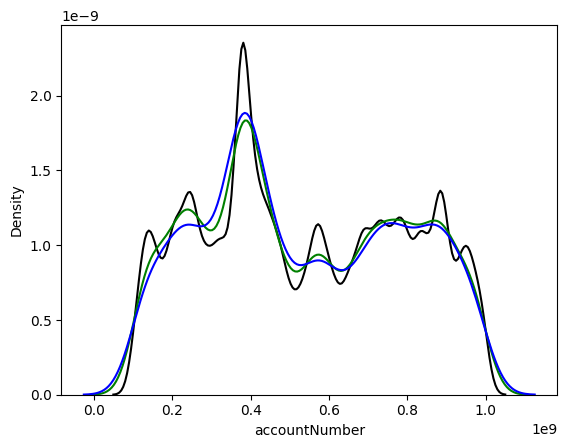

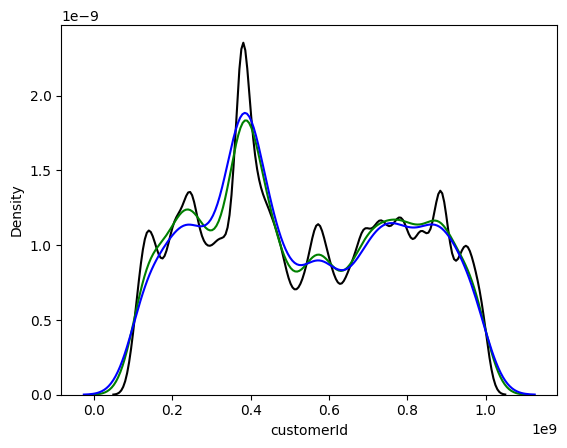

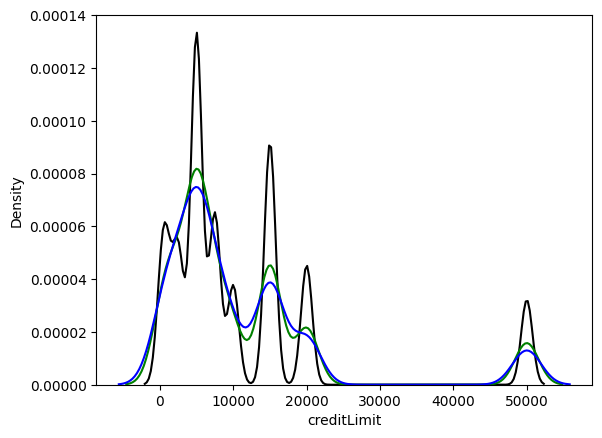

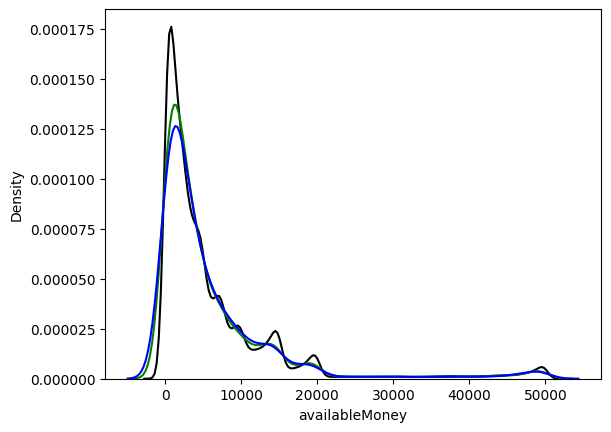

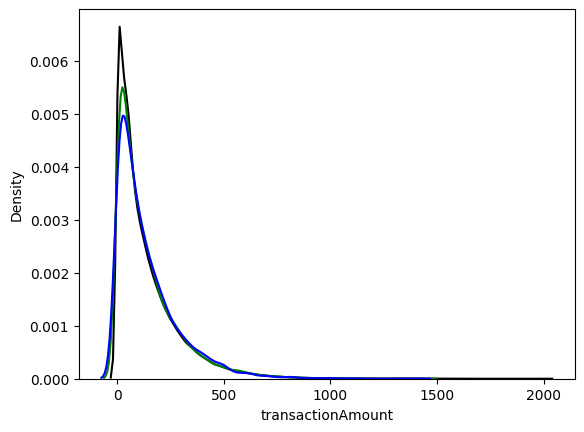

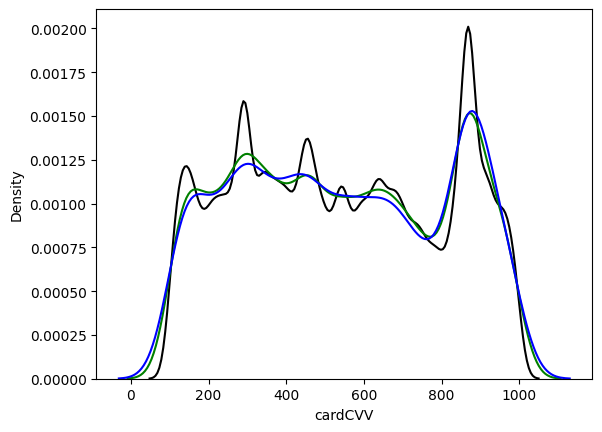

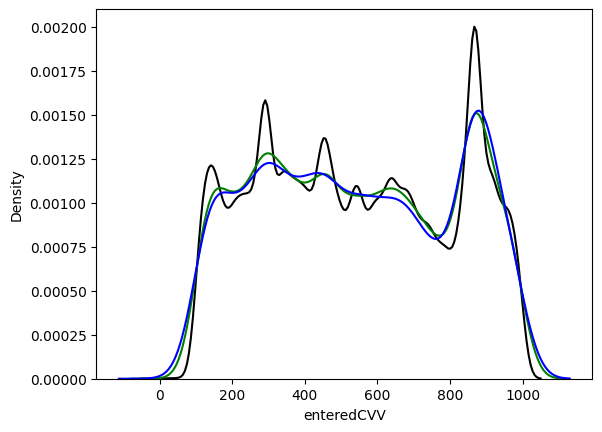

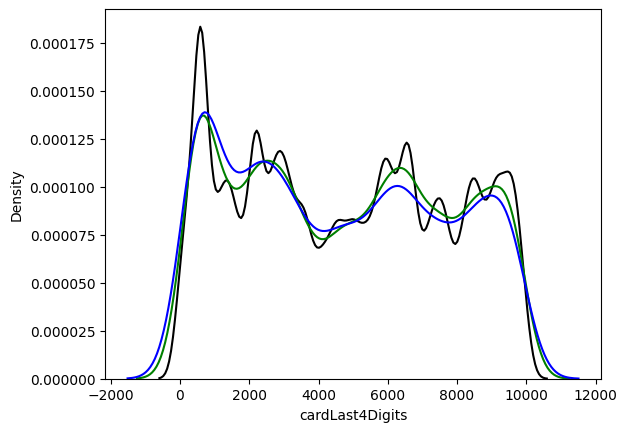

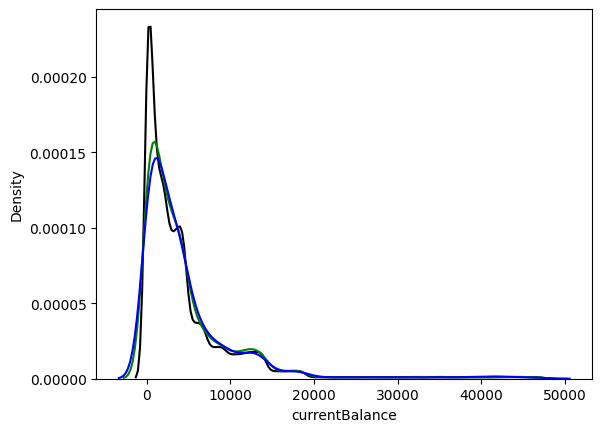

In [61]:
for i in num_cols:
    plt.figure()
    sns.kdeplot(data=df, x=i, color='black')
    sns.kdeplot(data=reverse_transactions, x=i, color='green')
    sns.kdeplot(data=mswipe_transactions, x=i, color='blue')

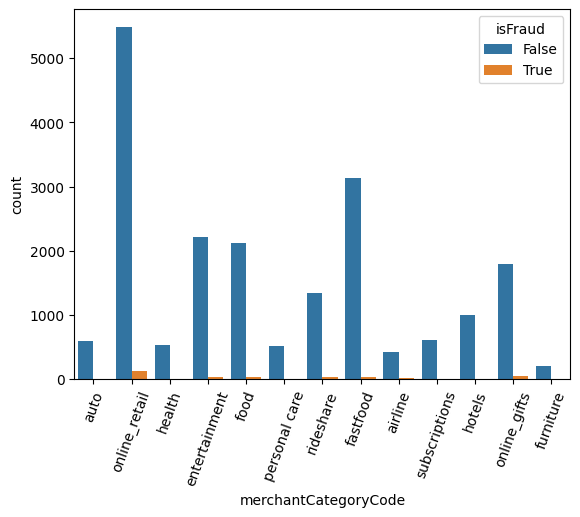

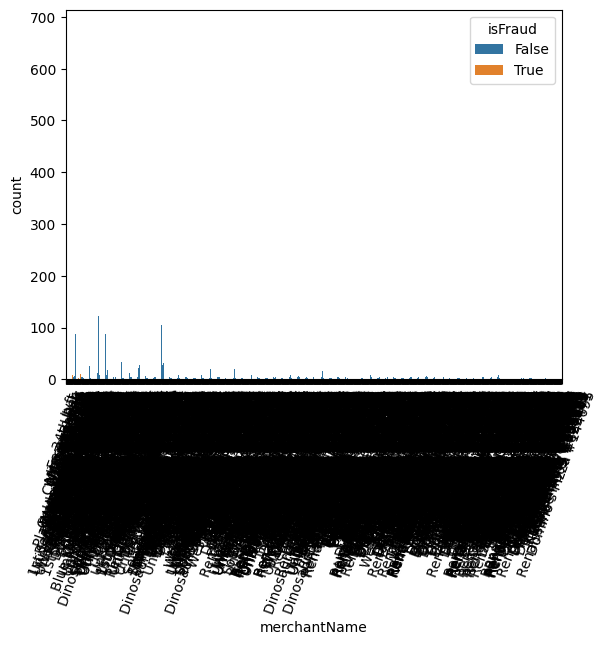

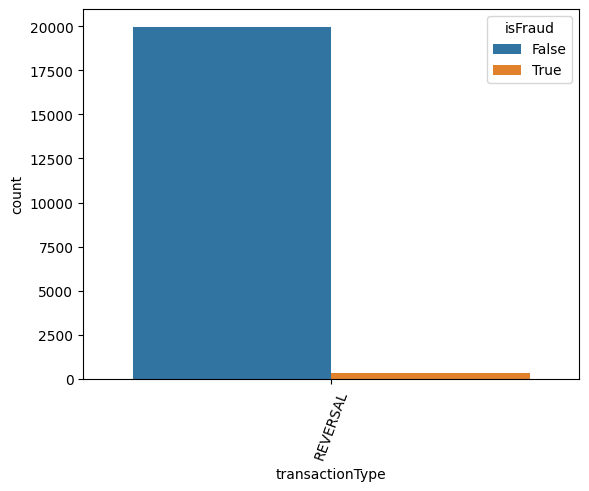

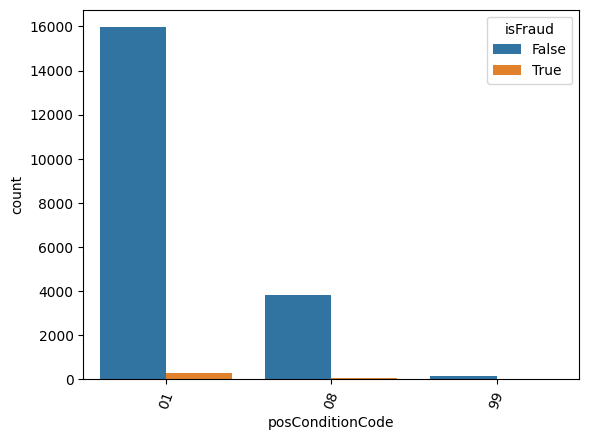

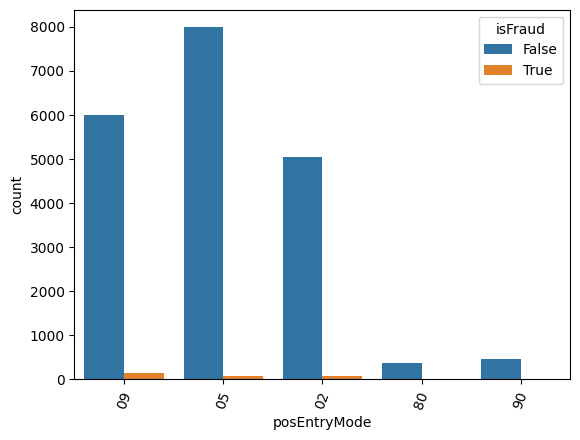

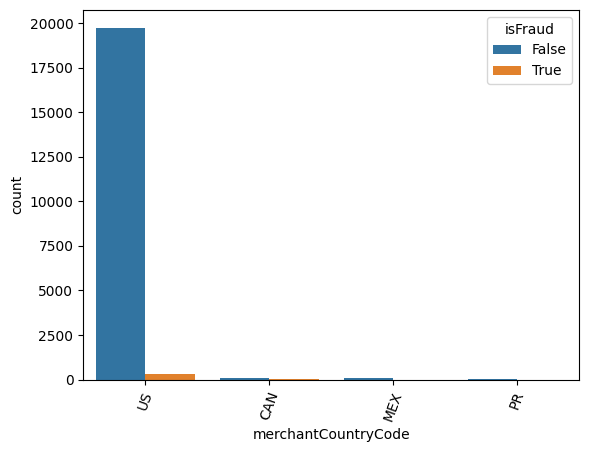

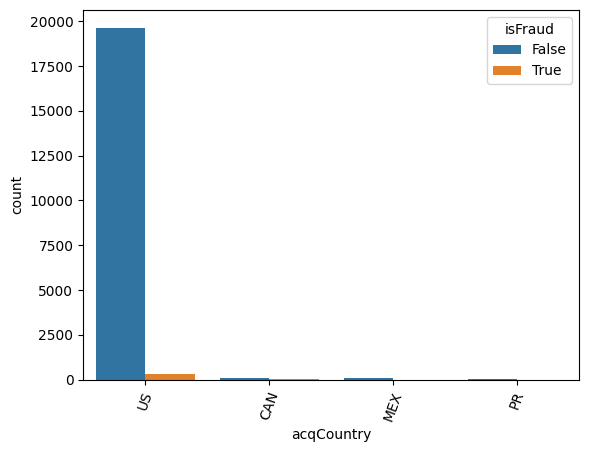

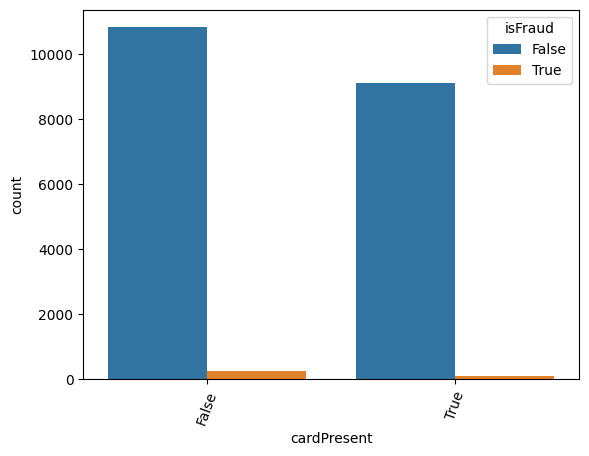

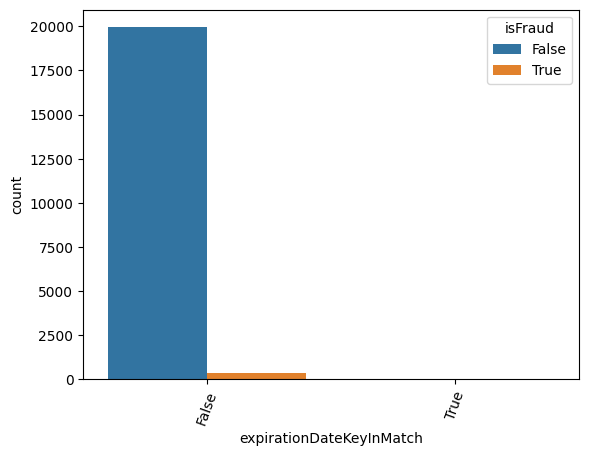

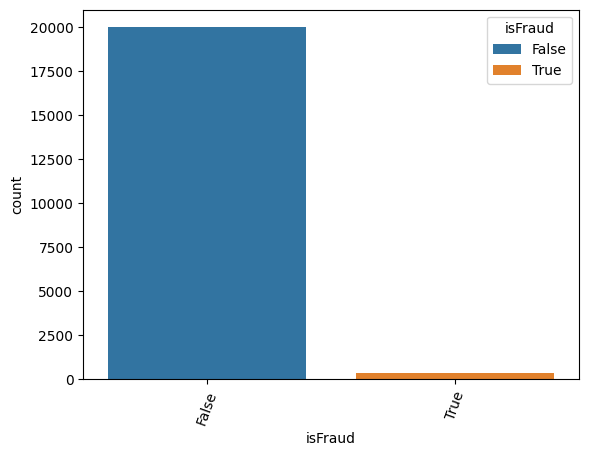

In [62]:
for i in [*cat_cols, *bool_cols]:
    plt.figure()
    sns.countplot(data=reverse_transactions, x=i, hue='isFraud')
    plt.xticks(rotation=70)

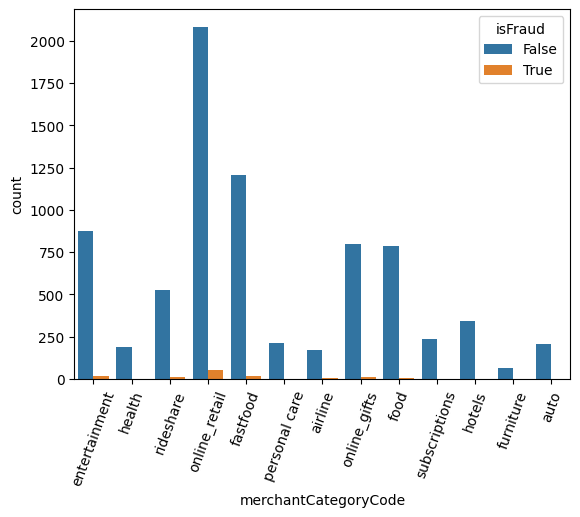

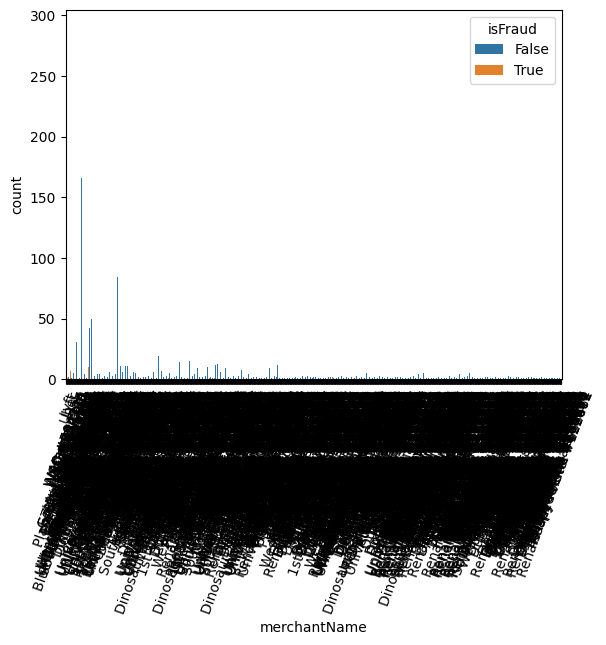

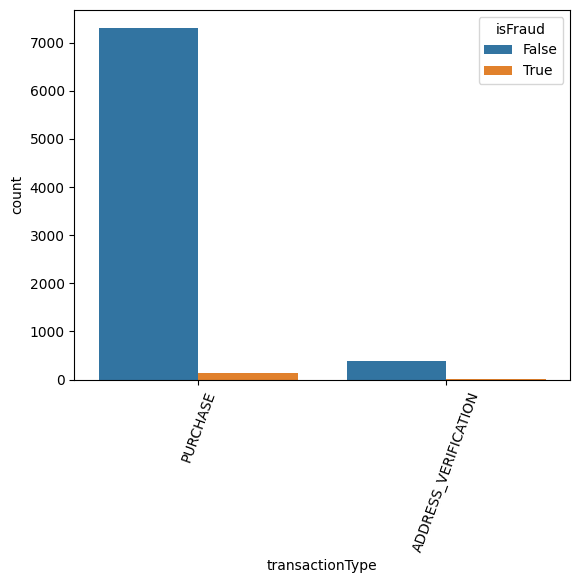

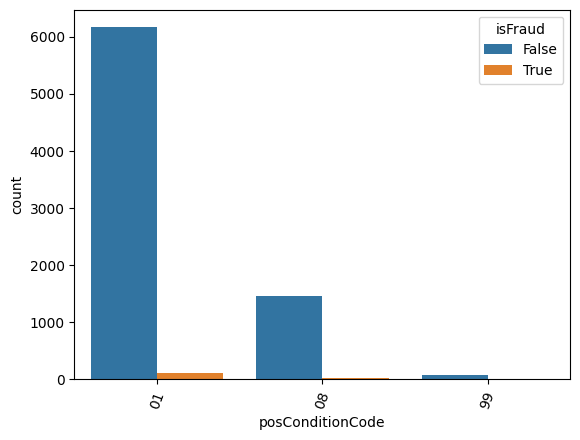

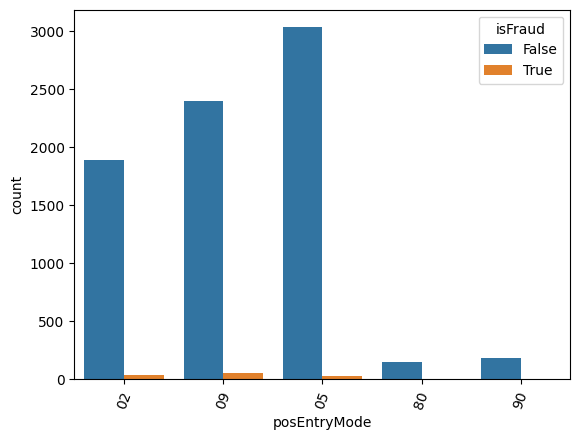

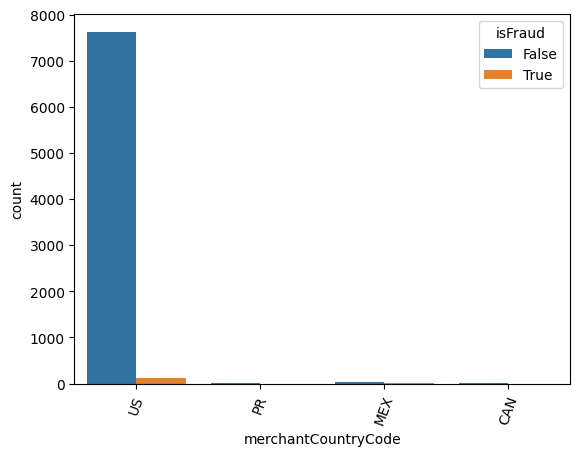

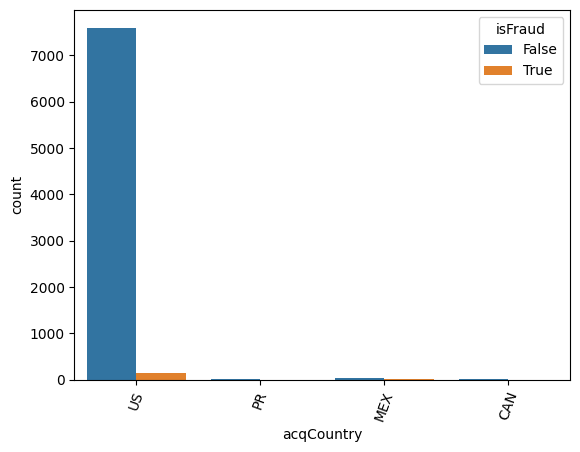

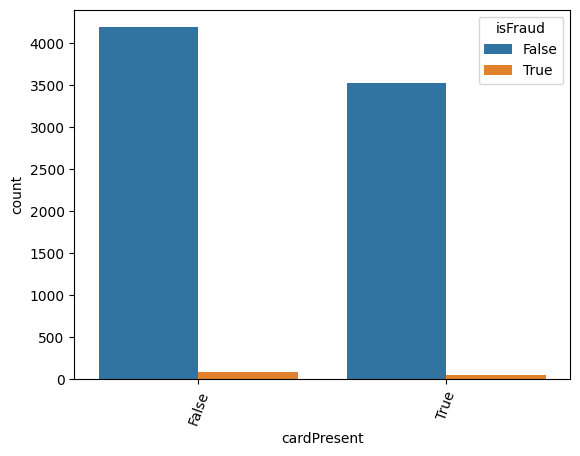

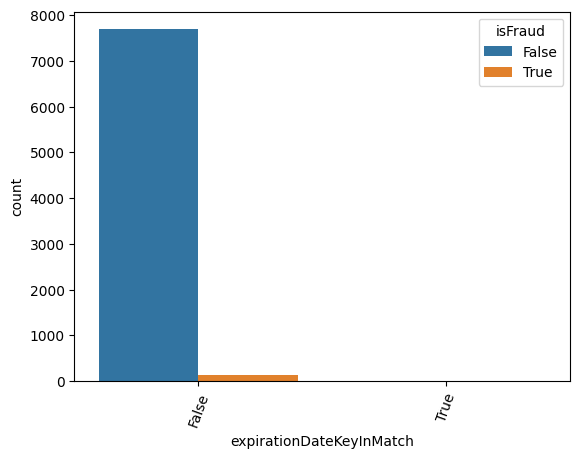

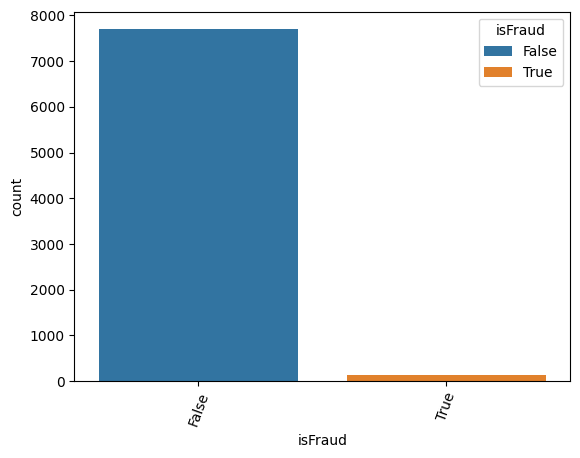

In [63]:
for i in [*cat_cols, *bool_cols]:
    plt.figure()
    sns.countplot(data=mswipe_transactions, x=i, hue='isFraud')
    plt.xticks(rotation=70)

In [64]:
reverse_transactions['expirationDateKeyInMatch'].value_counts()

expirationDateKeyInMatch
False    20290
True        13
Name: count, dtype: int64

Observations from multiswipe and reversed transactions: 

1. Median and mean of multiswipe transactionAmount is $140.8 and 94.2 respectively, and that for reverse transactions is $138.9 and #92. Both are higher than the mean and median of all transactions. 

2. There are no multi-swipe transactions for transactionType of "REVERSAL"

3. A large fraction of reverse transactions cane be attributed to merchantCategoryCodes associated with fast food, Food and entertainment do not account for fraud however. ONline gifts and Online retail are associated with fraud during reverse transactions 

4. With multiswipe transactions, Fastfood and entertainment are associated with fraudulent transactions. 

# PART 4 - MACHINE LEARNING MODEL

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix

In [66]:
df4=df.copy()

lets understand the output variable isFraud

data processing - remove all rows with null values

In [67]:
df4.shape

(786363, 23)

In [68]:
df4=df4.replace('',np.nan)
df4.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

In [69]:
df4.dropna(inplace=True)
df4.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [70]:
df4.shape

(776668, 23)

<Axes: xlabel='isFraud', ylabel='count'>

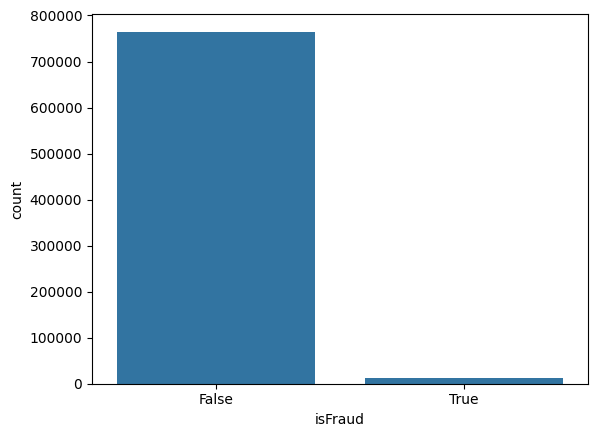

In [71]:
sns.countplot(df4, x='isFraud')

In [72]:
df4['isFraud'].value_counts()

isFraud
False    764702
True      11966
Name: count, dtype: int64

### Feature Engineering

Some features to build 
1. was the right CVV entered 
2. process the MerchantCategoryCode column for better bucketing of the data
3. a flag for expensive transactions
4. datetime features - day of the week, week of the year
5. time between transaction and last address change
6. time between transaction and account open

In [73]:
df4.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [74]:
df4["is_cvvmatch"] = df4["cardCVV"] == df4["enteredCVV"]
df4["is_cvvmatch"] = df4["is_cvvmatch"].map({True: 1, False: 0})

In [75]:
print("For matching CVVs fraud transaction distribution: \n")
print(df4[df4["is_cvvmatch"] == 1]["isFraud"].value_counts(normalize=True) * 100)

print("\nFor non matching CVVs fraud transaction distribution: \n")
print(df4[df4["is_cvvmatch"] == 0]["isFraud"].value_counts(normalize=True) * 100)

For matching CVVs fraud transaction distribution: 

isFraud
False    98.471168
True      1.528832
Name: proportion, dtype: float64

For non matching CVVs fraud transaction distribution: 

isFraud
False    97.142857
True      2.857143
Name: proportion, dtype: float64


In [76]:
df4['merchantCategoryCode'].value_counts(normalize=True)*100

merchantCategoryCode
online_retail           25.709827
fastfood                14.264139
entertainment           10.190841
food                     9.589941
online_gifts             8.423677
rideshare                6.503422
hotels                   4.335057
fuel                     3.042613
subscriptions            2.913729
auto                     2.748279
health                   2.427549
personal care            2.411069
airline                  1.955533
mobileapps               1.903902
online_subscriptions     1.407036
furniture                0.945964
food_delivery            0.772531
gym                      0.281072
cable/phone              0.173819
Name: proportion, dtype: float64

In [77]:
df4[df4['isFraud']==True]['merchantCategoryCode'].value_counts()

merchantCategoryCode
online_retail    4761
online_gifts     1534
rideshare        1233
fastfood         1031
food              978
entertainment     930
airline           512
auto              264
hotels            241
subscriptions     209
furniture         102
health             88
personal care      83
Name: count, dtype: int64

In [78]:
df4['merchantCategoryCode'].value_counts()

merchantCategoryCode
online_retail           199680
fastfood                110785
entertainment            79149
food                     74482
online_gifts             65424
rideshare                50510
hotels                   33669
fuel                     23631
subscriptions            22630
auto                     21345
health                   18854
personal care            18726
airline                  15188
mobileapps               14787
online_subscriptions     10928
furniture                 7347
food_delivery             6000
gym                       2183
cable/phone               1350
Name: count, dtype: int64

In [79]:
def categorize_merchants(x):
    #food and entertainment with fraud propensity
    if x in ['fastfood','food','fuel','entertainment']:
        return 0
    #online purchases and travel categories with fraud propensity
    elif x in ['online_gifts','online_retail','rideshare','airline', 'hotels']:
        return 1
    #personal categories with fraud propensity
    elif x in ['personal care','health','auto','subscriptions']:
        return 2
    #other categories not prone to fraud
    else:
        return 3

In [80]:
df4['merchantCategoryCode'].head()

0        rideshare
1    entertainment
2       mobileapps
3       mobileapps
4         fastfood
Name: merchantCategoryCode, dtype: object

In [81]:
df4['merchant_category_re']=pd.DataFrame(df4['merchantCategoryCode'].apply(lambda x: categorize_merchants(x)))
#d1.columns=['Categ_merchant']
#d1.head()

In [82]:
df4.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'is_cvvmatch',
       'merchant_category_re'],
      dtype='object')

<Axes: xlabel='transactionAmount', ylabel='Count'>

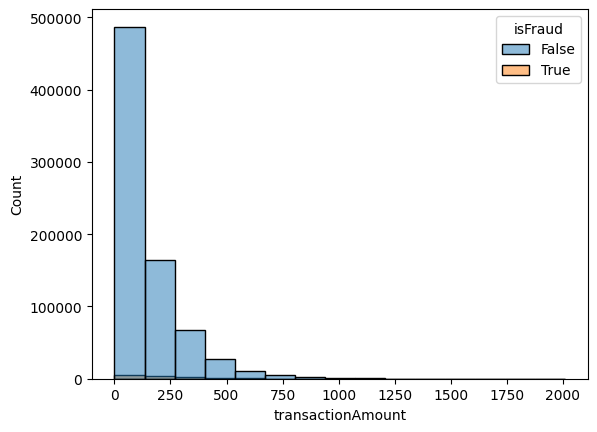

In [83]:
plt.figure()
sns.histplot(df4, x="transactionAmount", hue="isFraud", bins=15)

Most fraudulent transactions are below $250 

In [84]:
df4['expensive_transaction']=df4['transactionAmount'].apply(lambda x: 1 if x>250 else 0)

In [85]:
# Lets quickly check if there is some relation b/w day of week and fradulent activity
df4["trans_dow"] = pd.to_datetime(df4["transactionDateTime"]).dt.day_name()
df4[df4["isFraud"] == True]["trans_dow"].value_counts()

trans_dow
Friday       1791
Monday       1734
Wednesday    1719
Tuesday      1706
Thursday     1703
Sunday       1658
Saturday     1655
Name: count, dtype: int64

In [86]:
df4["trans_woy"] = pd.to_datetime(df4["transactionDateTime"]).dt.isocalendar().week
df4[df4["isFraud"] == True]["trans_woy"].value_counts()

trans_woy
19    262
2     259
25    255
39    251
49    249
31    246
8     245
28    243
6     242
17    241
43    241
10    239
7     236
30    236
41    235
1     234
15    234
35    234
5     233
12    231
23    231
3     230
20    229
27    229
51    228
29    228
26    227
36    227
22    226
9     225
32    225
11    224
48    224
44    224
40    223
42    223
34    223
47    220
45    220
50    220
21    220
16    219
38    219
37    218
14    216
18    216
24    213
13    211
46    210
33    209
4     205
52    159
53     99
Name: count, dtype: Int64

Create a flag for multiple swipe transactions

In [87]:
df4['pkey']=df4[pkey_cols].apply(lambda row: "_".join(row.values.astype(str)), axis=1)
df4['mswipe']=df4['pkey'].isin(mswipe_transactions['pkey']).map({True: 1, False: 0})
df4

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,is_cvvmatch,merchant_category_re,expensive_transaction,trans_dow,trans_woy,pkey,mswipe
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False,1,1,0,Saturday,32,737265056_Uber_2016-08-13 14:27:32_98.55_PURCHASE,0
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False,1,0,0,Tuesday,41,737265056_AMC #191138_2016-10-11 05:05:54_74.5...,0
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,1,3,0,Tuesday,45,737265056_Play Store_2016-11-08 09:18:39_7.47_...,0
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,1,3,0,Saturday,49,737265056_Play Store_2016-12-10 02:14:50_7.47_...,0
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False,1,0,0,Thursday,12,830329091_Tim Hortons #947751_2016-03-24 21:04...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,01,rideshare,2022-12-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False,1,1,0,Thursday,51,732852505_Lyft_2016-12-22 18:44:12_119.92_PURC...,0
786359,732852505,732852505,50000,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,2023-08-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False,1,3,0,Sunday,51,732852505_hulu.com_2016-12-25 16:20:34_18.89_P...,0
786360,732852505,732852505,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,01,rideshare,2025-08-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False,1,1,0,Tuesday,52,732852505_Lyft_2016-12-27 15:46:24_49.43_PURCHASE,0
786361,732852505,732852505,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,99,online_retail,2022-07-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False,1,1,0,Thursday,52,732852505_walmart.com_2016-12-29 00:30:55_49.8...,0


In [88]:
df4['mswipe'].value_counts()

mswipe
0    768929
1      7739
Name: count, dtype: int64

In [89]:
df4['transaction_open_days']=(df['transactionDateTime'] - df['accountOpenDate']).dt.days
df4['transaction_address_days']=(df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days

<Axes: xlabel='transaction_open_days', ylabel='Count'>

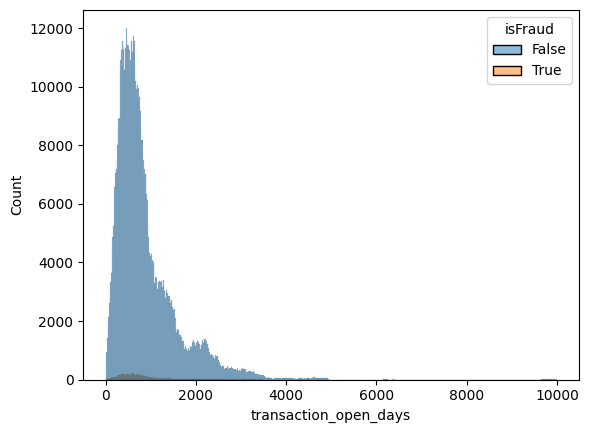

In [90]:
sns.histplot(df4, x="transaction_open_days", hue='isFraud')

<Axes: xlabel='transaction_address_days', ylabel='Count'>

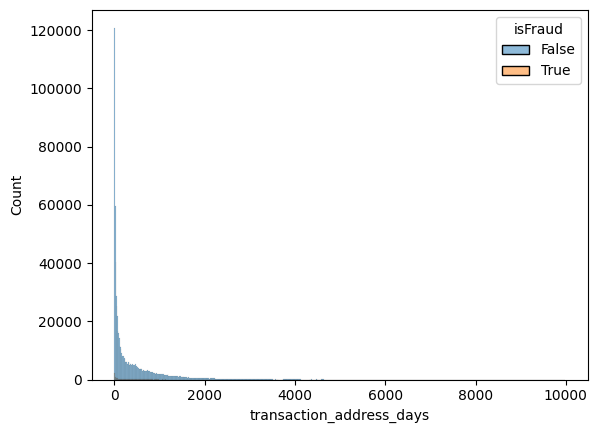

In [91]:
sns.histplot(df4, x="transaction_address_days", hue='isFraud')

<Axes: xlabel='transaction_open_days', ylabel='transaction_address_days'>

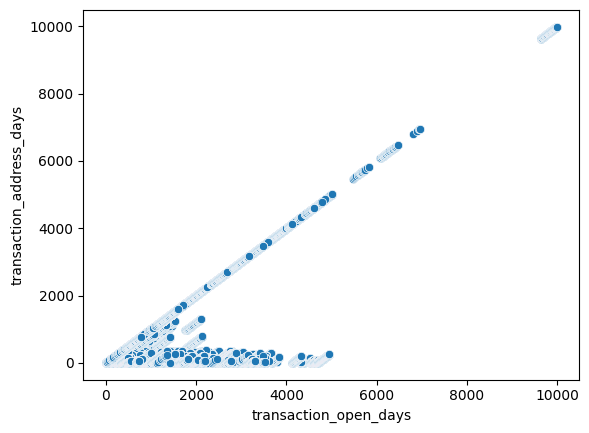

In [92]:
plt.figure()
sns.scatterplot(df4, x="transaction_open_days", y="transaction_address_days")

#### get the relevant columns for machine learning

convert boolean columns to 0/1 binary representation

In [93]:
m_bool_cols=bool_cols.copy()
m_bool_cols

['cardPresent', 'expirationDateKeyInMatch', 'isFraud']

In [94]:
for col in m_bool_cols:
    df4[col] = df4[col].replace({False: 0, True: 1})

m_bool_cols.append('is_cvvmatch')
m_bool_cols.append('mswipe')

In [95]:
m_bool_cols

['cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'is_cvvmatch', 'mswipe']

processing numerical columns

In [96]:
#there are six numerical columns for machine learning 
m_num_cols=['availableMoney', 'transactionAmount', 'trans_woy', 'transaction_open_days','transaction_address_days', 'currentBalance']
df4[m_num_cols]

,availableMoney,transactionAmount,trans_woy,transaction_open_days,transaction_address_days,currentBalance
0,5000.00,98.55,32,518,518,0.00
1,5000.00,74.51,41,577,577,0.00
2,5000.00,7.47,45,605,605,0.00
3,5000.00,7.47,49,637,637,0.00
4,5000.00,71.18,12,231,231,0.00
...,...,...,...,...,...,...
786358,48904.96,119.92,51,1582,1582,1095.04
786359,48785.04,18.89,51,1585,1585,1214.96
786360,48766.15,49.43,52,1587,1587,1233.85
786361,48716.72,49.89,52,1589,1589,1283.28


processing categorical columns and one hot encoding

In [97]:
df4.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,is_cvvmatch,merchant_category_re,expensive_transaction,trans_dow,trans_woy,pkey,mswipe,transaction_open_days,transaction_address_days
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,0,0,0,1,1,0,Saturday,32,737265056_Uber_2016-08-13 14:27:32_98.55_PURCHASE,0,518,518
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,1,0,0,1,0,0,Tuesday,41,737265056_AMC #191138_2016-10-11 05:05:54_74.5...,0,577,577
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,0,0,0,1,3,0,Tuesday,45,737265056_Play Store_2016-11-08 09:18:39_7.47_...,0,605,605
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,0,0,0,1,3,0,Saturday,49,737265056_Play Store_2016-12-10 02:14:50_7.47_...,0,637,637
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,1,0,0,1,0,0,Thursday,12,830329091_Tim Hortons #947751_2016-03-24 21:04...,0,231,231


In [98]:
df4.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'is_cvvmatch',
       'merchant_category_re', 'expensive_transaction', 'trans_dow',
       'trans_woy', 'pkey', 'mswipe', 'transaction_open_days',
       'transaction_address_days'],
      dtype='object')

In [99]:
#there are four boolean columns for machine learning + target variable (isFraud)
m_bool_cols

['cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'is_cvvmatch', 'mswipe']

In [100]:
df4['expirationDateKeyInMatch'].value_counts()

expirationDateKeyInMatch
0    775642
1      1026
Name: count, dtype: int64

In [101]:
#there are 9 non-boolean categorical columns for machine learning
m_cat_cols=['creditLimit','acqCountry','merchantCountryCode' ,'posEntryMode', 'posConditionCode', 'transactionType', 'trans_dow', 'merchant_category_re','expensive_transaction']
len(m_cat_cols)

9

In [102]:
df5=pd.get_dummies(df4, columns=m_cat_cols, drop_first=True, dtype='int')
df5.head()

,accountNumber,customerId,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,is_cvvmatch,trans_woy,pkey,mswipe,transaction_open_days,transaction_address_days,creditLimit_500,creditLimit_1000,creditLimit_2500,creditLimit_5000,creditLimit_7500,creditLimit_10000,creditLimit_15000,creditLimit_20000,creditLimit_50000,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,transactionType_PURCHASE,transactionType_REVERSAL,trans_dow_Monday,trans_dow_Saturday,trans_dow_Sunday,trans_dow_Thursday,trans_dow_Tuesday,trans_dow_Wednesday,merchant_category_re_1,merchant_category_re_2,merchant_category_re_3,expensive_transaction_1
0,737265056,737265056,5000.0,2016-08-13 14:27:32,98.55,Uber,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,0.0,0,0,0,1,32,737265056_Uber_2016-08-13 14:27:32_98.55_PURCHASE,0,518,518,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,737265056,737265056,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,0.0,1,0,0,1,41,737265056_AMC #191138_2016-10-11 05:05:54_74.5...,0,577,577,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,737265056,737265056,5000.0,2016-11-08 09:18:39,7.47,Play Store,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,0.0,0,0,0,1,45,737265056_Play Store_2016-11-08 09:18:39_7.47_...,0,605,605,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,737265056,737265056,5000.0,2016-12-10 02:14:50,7.47,Play Store,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,0.0,0,0,0,1,49,737265056_Play Store_2016-12-10 02:14:50_7.47_...,0,637,637,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,830329091,830329091,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,0.0,1,0,0,1,12,830329091_Tim Hortons #947751_2016-03-24 21:04...,0,231,231,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [103]:
df5.columns

Index(['accountNumber', 'customerId', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'merchantCategoryCode',
       'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange',
       'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'is_cvvmatch',
       'trans_woy', 'pkey', 'mswipe', 'transaction_open_days',
       'transaction_address_days', 'creditLimit_500', 'creditLimit_1000',
       'creditLimit_2500', 'creditLimit_5000', 'creditLimit_7500',
       'creditLimit_10000', 'creditLimit_15000', 'creditLimit_20000',
       'creditLimit_50000', 'acqCountry_MEX', 'acqCountry_PR', 'acqCountry_US',
       'merchantCountryCode_MEX', 'merchantCountryCode_PR',
       'merchantCountryCode_US', 'posEntryMode_05', 'posEntryMode_09',
       'posEntryMode_80', 'posEntryMode_90', 'posConditionCode_08',
       'posConditionCode_99', 'transactionType_PURCHASE',
       'transactionType_RE

drop all the irrelevant columns

relevant columns for machine learning are:

1. 7 boolean columns - ['cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'is_cvvmatch', 'mswipe']
2. 7 numerical columns - ['availableMoney', 'transactionAmount', 'trans_woy', 'transaction_open_days', 'transaction_address_days', 'currentBalance']
3. 9 categorical columns - ['creditLimit','acqCountry','merchantCountryCode' ,'posEntryMode', 'posConditionCode', 'transactionType', 'trans_dow', 'merchant_category_re','expensive_transaction']

In [104]:
m_cols_to_drop=['accountNumber', 'customerId', 'transactionDateTime', 'merchantName', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'pkey']
df5.drop(columns=m_cols_to_drop, inplace=True)
df5.head()

,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,is_cvvmatch,trans_woy,mswipe,transaction_open_days,transaction_address_days,creditLimit_500,creditLimit_1000,creditLimit_2500,creditLimit_5000,creditLimit_7500,creditLimit_10000,creditLimit_15000,creditLimit_20000,creditLimit_50000,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,transactionType_PURCHASE,transactionType_REVERSAL,trans_dow_Monday,trans_dow_Saturday,trans_dow_Sunday,trans_dow_Thursday,trans_dow_Tuesday,trans_dow_Wednesday,merchant_category_re_1,merchant_category_re_2,merchant_category_re_3,expensive_transaction_1
0,5000.0,98.55,0.0,0,0,0,1,32,0,518,518,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,5000.0,74.51,0.0,1,0,0,1,41,0,577,577,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,5000.0,7.47,0.0,0,0,0,1,45,0,605,605,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,5000.0,7.47,0.0,0,0,0,1,49,0,637,637,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,5000.0,71.18,0.0,1,0,0,1,12,0,231,231,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


### Building a machine learning model 

Since the data is highly imbalanced, I will use undersampling to balance the data and reduce chances of overfitting. 
I will use a test size of 10% of the dataset

In [105]:
train_data, test_data = train_test_split(df5, stratify=df5["isFraud"], test_size=0.10, random_state=42)
train_data.shape

(699001, 44)

In [106]:
train_data = train_data.sample(frac=1, random_state=42)
train_data_fraud = train_data.loc[train_data["isFraud"] == 1]

train_data_non_fraud = train_data.loc[train_data["isFraud"] == 0][: int(train_data["isFraud"].value_counts()[1] * 1.20)]

new_train_data = pd.concat([train_data_fraud, train_data_non_fraud])

# Shuffling the dataframe rows
train_data_undersampled = new_train_data.sample(frac=1, random_state=42)
train_data_undersampled = train_data_undersampled.reset_index(drop = True)

In [107]:
train_data_undersampled.shape

(23691, 44)

In [108]:
train_data_undersampled['isFraud'].value_counts()

isFraud
0    12922
1    10769
Name: count, dtype: int64

Split the validation set from the training set

In [109]:
X = train_data_undersampled.drop(columns=["isFraud"]).copy()
y = train_data_undersampled["isFraud"].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.10, random_state=42)

In [110]:
# Looking at the target variable split across training, validation and testing sets
X_test = test_data.drop(columns=["isFraud"])
y_test = test_data['isFraud']


print("Training data split \n")
print(y_train.value_counts())

print("\nValidation data split")
print(y_val.value_counts())

print("\Test data split")
print(y_test.value_counts())

Training data split 

isFraud
0    11629
1     9692
Name: count, dtype: int64

Validation data split
isFraud
0    1293
1    1077
Name: count, dtype: int64
\Test data split
isFraud
0    76470
1     1197
Name: count, dtype: int64


I will use RandomForsest with RandomizedSearch for hyperparameters - this method is less prone to overfitting due to bootstrap aggregation - the model is constrained to predict based on limited sample and feature information. 

Tree based models also do not need the numerical columsn to be standardized so we are good to start training

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

model_params = {'n_estimators':range(100,800,100),'max_depth': range(8,14),'min_samples_split':range(6,20,2)}

In [145]:
# random forest model, train and get best estimator
rf_model = RandomForestClassifier()

hy_search=0

if hy_search==1: 
    clf = RandomizedSearchCV(rf_model, model_params, n_iter=50, cv=4, scoring='f1',random_state=42)
    model = clf.fit(X_train, y_train)
    print(model.best_estimator_) 
else: 
    clf=RandomForestClassifier(max_depth=13, min_samples_split=10, n_estimators=300)
    model = clf.fit(X_train, y_train)

#model.best_estimator_

RandomForestClassifier(max_depth=13, min_samples_split=10, n_estimators=300)


In [113]:
#clf.fit(X_train,y_train)
y_val_pred=clf.predict(X_val)

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual Positive:0'), Text(0, 1.5, 'Actual Negative:1')])

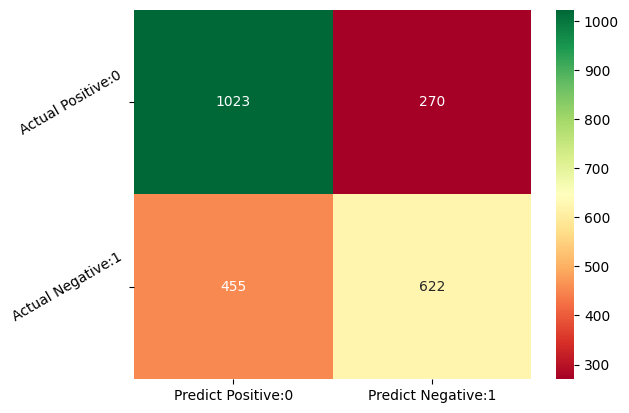

In [114]:
# visualize confusion matrix for validation set predictions 
cm=confusion_matrix(y_val, y_val_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], index=['Actual Positive:0', 'Actual Negative:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlGn')
plt.yticks(rotation=30)

In [115]:
# Model metrics for validation set 
print("Accuracy:",round(accuracy_score(y_val, y_val_pred),2))
print("Precision Score:",round(precision_score(y_val, y_val_pred),2))
print("F-1 Score:",round(f1_score(y_val, y_val_pred),2))

Accuracy: 0.69
Precision Score: 0.7
F-1 Score: 0.63


Text(0.5, 0, 'Relative Importance')

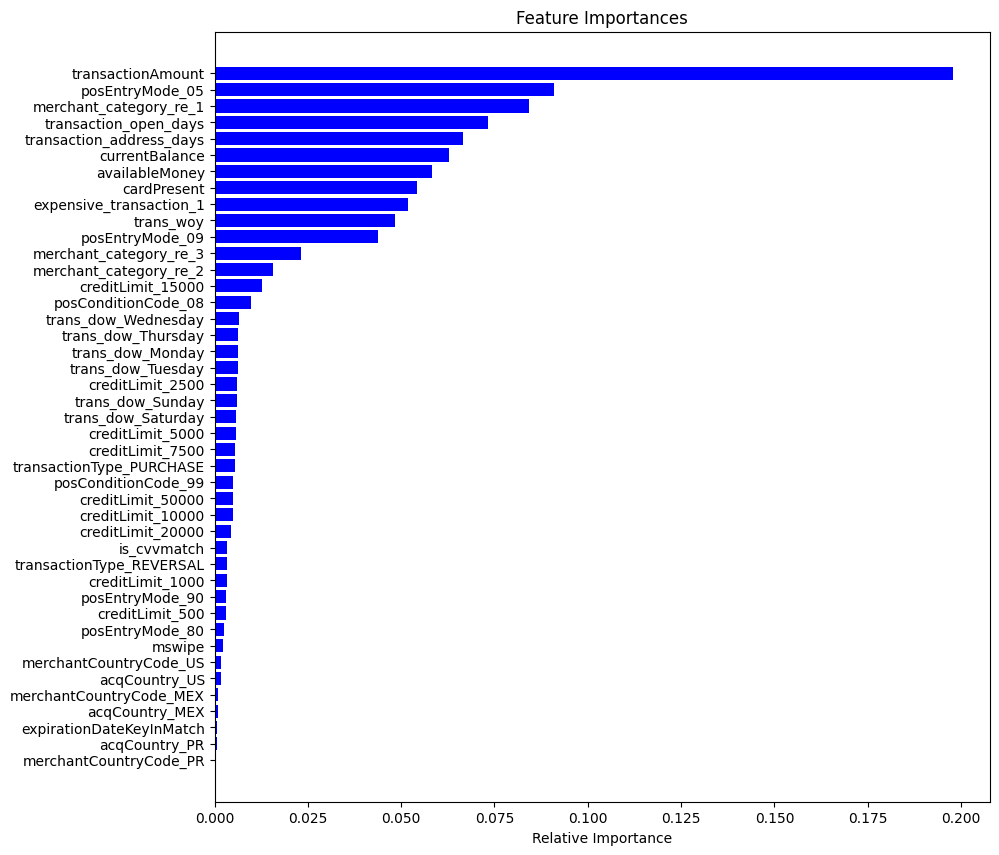

In [116]:
features=X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [127]:
import shap
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

shap.initjs()

In [126]:
# compute SHAP values
explainer = TreeExplainer(model)
sv=explainer(X_train)

In [141]:
y_train==1

15139    False
10697     True
14342    False
22893    False
8439     False
         ...  
15291     True
14275     True
12140     True
12537     True
11669    False
Name: isFraud, Length: 21321, dtype: bool

0


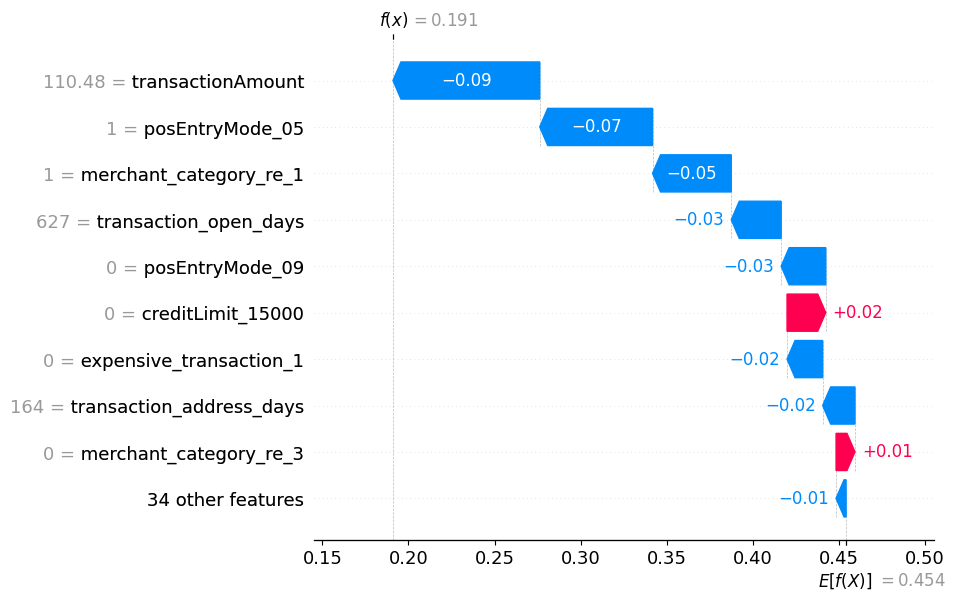

In [144]:
exp = Explanation(sv.values[:,:,1], sv.base_values[:,1], data=X_train.values, feature_names=X_train.columns)
idx = 0
print(y_train[idx])
waterfall(exp[idx])


1


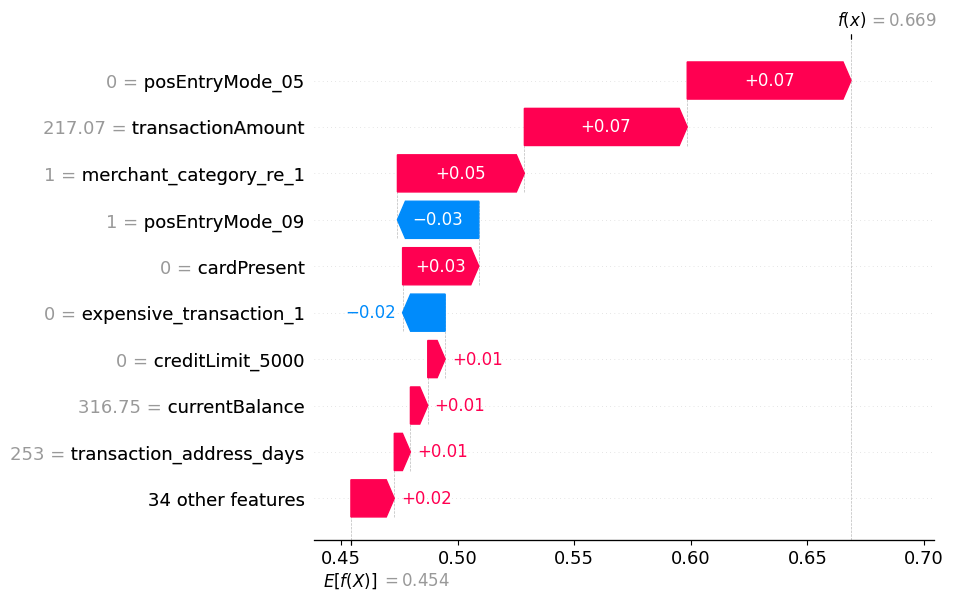

In [146]:
exp = Explanation(sv.values[:,:,1], sv.base_values[:,1], data=X_train.values, feature_names=X_train.columns)
idx = 1
print(y_train[idx])
waterfall(exp[idx])

Finally, lets see how the model performs on the test set

In [147]:
y_test_pred=clf.predict(X_test)

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual Positive:0'), Text(0, 1.5, 'Actual Negative:1')])

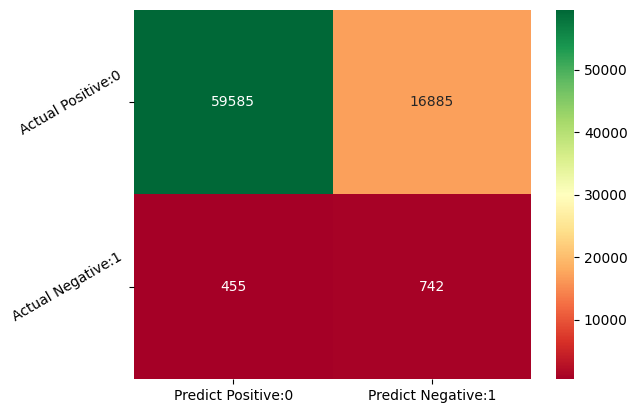

In [148]:
# visualize confusion matrix for test set predictions 
cm=confusion_matrix(y_test, y_test_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], index=['Actual Positive:0', 'Actual Negative:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlGn')
plt.yticks(rotation=30)

In [149]:
# Model metrics for test set 
print("Accuracy:",round(accuracy_score(y_test, y_test_pred),2))
print("Precision Score:",round(precision_score(y_test, y_test_pred),2))
print("F-1 Score:",round(f1_score(y_test, y_test_pred),2))

Accuracy: 0.78
Precision Score: 0.04
F-1 Score: 0.08
